In [255]:
# The causalTree package is not in CRAN, the most common R repository.
# To install it, uncomment the next lines as appropriate.
# install.packages("devtools")  # if you don't have this installed yet.
# devtools::install_github('susanathey/causalTree') 

library(causalTree)
# use e.g., install.packages("grf") to install any of the following packages.
library(grf)
library(rpart)
library(glmnet)
library(splines)
library(MASS)
library(lmtest)
library(sandwich)
library(ggplot2)
library(haven)

In [511]:
data <- read_dta("C:/Users/sandr/Dropbox/MGTECON634_Project/data/matching_panel5_treat12.dta")

In [512]:
is.data.frame(data)

[1] TRUE

In [4]:
# stay treat12 tenured level sex age clasification cpelec cpwater

# Clean Data

In [513]:
# Dummy for sex, and categorical values for level and clasification 
data$sex[data$sex == 1] <- 1
data$sex[data$sex == 2] <- 0
data$level <- as.factor(data$level)
data$clasification <- as.factor(data$clasification)

In [514]:
outcome <- "stay"
treatment <- "treat12"
covariates = c("tenured", "level", "sex", "age", "clasification", 
               "cpelec", "cpwater", "nlat_ie", "nlong_ie")

# Replicate main Results

In [515]:
# Treatment Effect on Retention for Teachers at Isolated/Rural Boundary
# Permanent
fmla <- formula(stay ~  treat12 + tenured + sex + age + 
                        factor(level) + factor(clasification) 
                        + cpelec + cpwater)
ols <- lm(fmla, data=subset(data, tenured==1 & strict_qualified == 1 & ano== 2016 ))
ols.res <- coeftest(ols, vcov=vcovHC(ols, type='HC2'))
#ols.res
summary(ols)


Call:
lm(formula = fmla, data = subset(data, tenured == 1 & strict_qualified == 
    1 & ano == 2016))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.98581  0.05739  0.08545  0.11004  0.19524 

Coefficients: (1 not defined because of singularities)
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             0.7054709  0.0176330  40.009   <2e-16 ***
treat12                 0.0002453  0.0040631   0.060   0.9519    
tenured                        NA         NA      NA       NA    
sex                    -0.0094226  0.0040820  -2.308   0.0210 *  
age                     0.0037790  0.0002617  14.439   <2e-16 ***
factor(level)2          0.0083060  0.0099193   0.837   0.4024    
factor(level)3          0.0049741  0.0113954   0.436   0.6625    
factor(clasification)2 -0.0086832  0.0065443  -1.327   0.1846    
factor(clasification)3 -0.0004257  0.0073458  -0.058   0.9538    
cpelec                  0.0227707  0.0094413   2.412   0.0159 *  
cpwater   

In [516]:
# Treatment Effect on Retention for Teachers at Isolated/Rural Boundary
# Qualified Temporary
fmla <- formula(stay ~  treat12 + tenured + sex + age + 
                        factor(level) + factor(clasification) 
                        + cpelec + cpwater)
ols <- lm(fmla, data=subset(data, tenured==0 & strict_qualified == 1 & ano== 2016 ))
ols.res <- coeftest(ols, vcov=vcovHC(ols, type='HC2'))
#ols.res
summary(ols)


Call:
lm(formula = fmla, data = subset(data, tenured == 0 & strict_qualified == 
    1 & ano == 2016))

Residuals:
    Min      1Q  Median      3Q     Max 
-0.4330 -0.2964 -0.2522  0.6522  0.8336 

Coefficients: (1 not defined because of singularities)
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)             0.110352   0.020276   5.442 5.30e-08 ***
treat12                 0.047713   0.006041   7.898 2.94e-15 ***
tenured                       NA         NA      NA       NA    
sex                     0.007348   0.006219   1.181   0.2374    
age                     0.003071   0.000405   7.584 3.47e-14 ***
factor(level)2          0.004622   0.008742   0.529   0.5970    
factor(level)3          0.009403   0.011835   0.794   0.4269    
factor(clasification)2 -0.008398   0.009140  -0.919   0.3582    
factor(clasification)3  0.062801   0.010961   5.729 1.02e-08 ***
cpelec                 -0.020036   0.010036  -1.996   0.0459 *  
cpwater                 0.00993

In [517]:
# Treatment Effect on Retention for Teachers at Isolated/Rural Boundary
# Unqualified Temporary
fmla <- formula(stay ~  treat12 + tenured + sex + age + 
                        factor(level) + factor(clasification) 
                        + cpelec + cpwater)
ols <- lm(fmla, data=subset(data, tenured==0 & strict_qualified == 0 & ano== 2016 ))
ols.res <- coeftest(ols, vcov=vcovHC(ols, type='HC2'))
ols.res


t test of coefficients:

                         Estimate Std. Error t value  Pr(>|t|)    
(Intercept)             0.1248870  0.0494152  2.5273 0.0115435 *  
treat12                 0.0408633  0.0209398  1.9515 0.0510916 .  
sex                    -0.0022900  0.0201888 -0.1134 0.9096973    
age                     0.0040742  0.0010582  3.8501 0.0001205 ***
factor(level)2         -0.0560187  0.0254597 -2.2003 0.0278596 *  
factor(level)3         -0.0599011  0.0321866 -1.8611 0.0628302 .  
factor(clasification)2  0.0320481  0.0249825  1.2828 0.1996507    
factor(clasification)3  0.0912484  0.0297241  3.0698 0.0021602 ** 
cpelec                 -0.0072515  0.0189478 -0.3827 0.7019619    
cpwater                -0.0298502  0.0211662 -1.4103 0.1585591    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


# Via causal trees

In [11]:
# # Only valid for randomized data!
# fmla <- paste(outcome, " ~", paste(covariates, collapse = " + "))
# X <- model.matrix(fmla, data)

In [12]:
# fmla <- formula(stay ~  tenured + sex + age)
# fmla

In [13]:
# # Prepare dataset
# fmla <- formula(paste0("~ 0 + ", paste0(covariates, collapse="+")))
# X <- model.matrix(fmla, data)

In [14]:
#stay treat12 tenured level sex age clasification cpelec cpwater

## Data from temporary teachers in 2016

In [518]:
data_main_col <- data.frame(data$stay, data$treat12,data$tenured, 
                            data$level, data$sex, data$age, data$clasification, 
                            data$cpelec, data$cpwater, data$nlat_ie, data$nlong_ie,
                           data$x_dim, data$y_dim, data$ano)
 
names(data_main_col) <- c('stay', 'treat12', 'tenured', 'level', 'sex', 'age', 
                       'clasification', 'cpelec', 'cpwater', "nlat_ie", "nlong_ie", "x_dim", "y_dim", "ano")
data_clean = na.omit(data_main_col)

In [519]:
data_clean <- subset(data_clean, ano== 2016 & tenured == 0)

In [520]:
dim(data_clean)

[1] 29606    14

# Using Blocks

In [534]:
data[,"clasification"] <- as.integer(as.character(data[,"clasification"]))
data[,"level"] <- as.integer(as.character(data[,"level"]))
covariates = c("tenured", "level", "sex", "age", "clasification", 
               "cpelec", "cpwater", "x_dim", "y_dim")

Warning message in eval(expr, envir, enclos):
"NAs introducidos por coerción"
Warning message in eval(expr, envir, enclos):
"NAs introducidos por coerción"


In [535]:
# Treatment Effect on Retention for Teachers at Isolated/Rural Boundary
# Permanent
fmla <- paste(outcome, " ~", paste(covariates, collapse = " + "))

# fmla <- formula(stay ~  treat12 + tenured + sex + age + 
#                         factor(level) + factor(clasification) 
#                         + cpelec + cpwater + x_dim + y_dim)
ols <- lm(fmla, data=data_clean)
ols.res <- coeftest(ols, vcov=vcovHC(ols, type='HC2'))
#ols.res
summary(ols)


Call:
lm(formula = fmla, data = data_clean)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.5311 -0.2939 -0.2460  0.6480  0.8594 

Coefficients: (1 not defined because of singularities)
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -7.275e-02  2.574e-02  -2.826  0.00472 ** 
tenured                NA         NA      NA       NA    
level2         -2.138e-03  8.049e-03  -0.266  0.79055    
level3          1.579e-02  1.064e-02   1.484  0.13781    
sex             4.689e-03  5.819e-03   0.806  0.42042    
age             3.209e-03  3.584e-04   8.955  < 2e-16 ***
clasification2 -5.211e-03  8.418e-03  -0.619  0.53592    
clasification3  4.976e-02  9.850e-03   5.052 4.39e-07 ***
cpelec         -3.274e-03  8.469e-03  -0.387  0.69907    
cpwater         2.396e-02  5.903e-03   4.059 4.94e-05 ***
x_dim           1.067e-04  1.292e-05   8.257  < 2e-16 ***
y_dim           1.262e-04  1.010e-05  12.500  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.0

In [536]:
# Dividing data into three subsets
indices <- split(seq(nrow(data_clean)), sort(seq(nrow(data_clean)) %% 3))
names(indices) <- c('split', 'est', 'test')

In [537]:
fmla <- formula(stay ~  tenured + sex + age + 
                        factor(level) + factor(clasification)
                        + cpelec + cpwater + x_dim + y_dim)
fmla

stay ~ tenured + sex + age + factor(level) + factor(clasification) + 
    cpelec + cpwater + x_dim + y_dim

In [538]:
dim(data_clean)

[1] 29606    14

In [539]:
# Fitting the forest
ct.unpruned <- honest.causalTree(
  formula=fmla,            # Define the model
  data=data_clean[indices$split,],
  treatment=data_clean[indices$split, treatment],
  est_data=data_clean[indices$est,],
  est_treatment=data_clean[indices$est, treatment],
  minsize=100,                 # Min. number of treatment and control cases in each leaf
  HonestSampleSize=length(indices$est), #  Num obs used in estimation after splitting
  # We recommend not changing the parameters below
  split.Rule="CT",            # Define the splitting option
  cv.option="TOT",            # Cross validation options
  cp=0,                       # Complexity parameter
  split.Honest=TRUE,          # Use honesty when splitting
  cv.Honest=TRUE              # Use honesty when performing cross-validation
)


[1] 2
[1] "CT"


In [540]:
# Table of cross-validated values by tuning parameter.
ct.cptable <- as.data.frame(ct.unpruned$cptable)

In [541]:
# Obtain optimal complexity parameter to prune tree.
cp.selected <- which.min(ct.cptable$xerror)
cp.optimal <- ct.cptable[cp.selected, "CP"]

In [542]:
# Prune the tree at optimal complexity parameter.
ct.pruned <- prune(tree=ct.unpruned, cp=cp.optimal)

In [543]:
# Predict point estimates (on estimation sample)
tau.hat.est <- predict(ct.pruned, newdata=data_clean[indices$est,])

# Create a factor column 'leaf' indicating leaf assignment in the estimation set
num.leaves <- length(unique(tau.hat.est))
leaf <- factor(tau.hat.est, levels=sort(unique(tau.hat.est)), labels = seq(num.leaves))

In [544]:
num.leaves

[1] 6

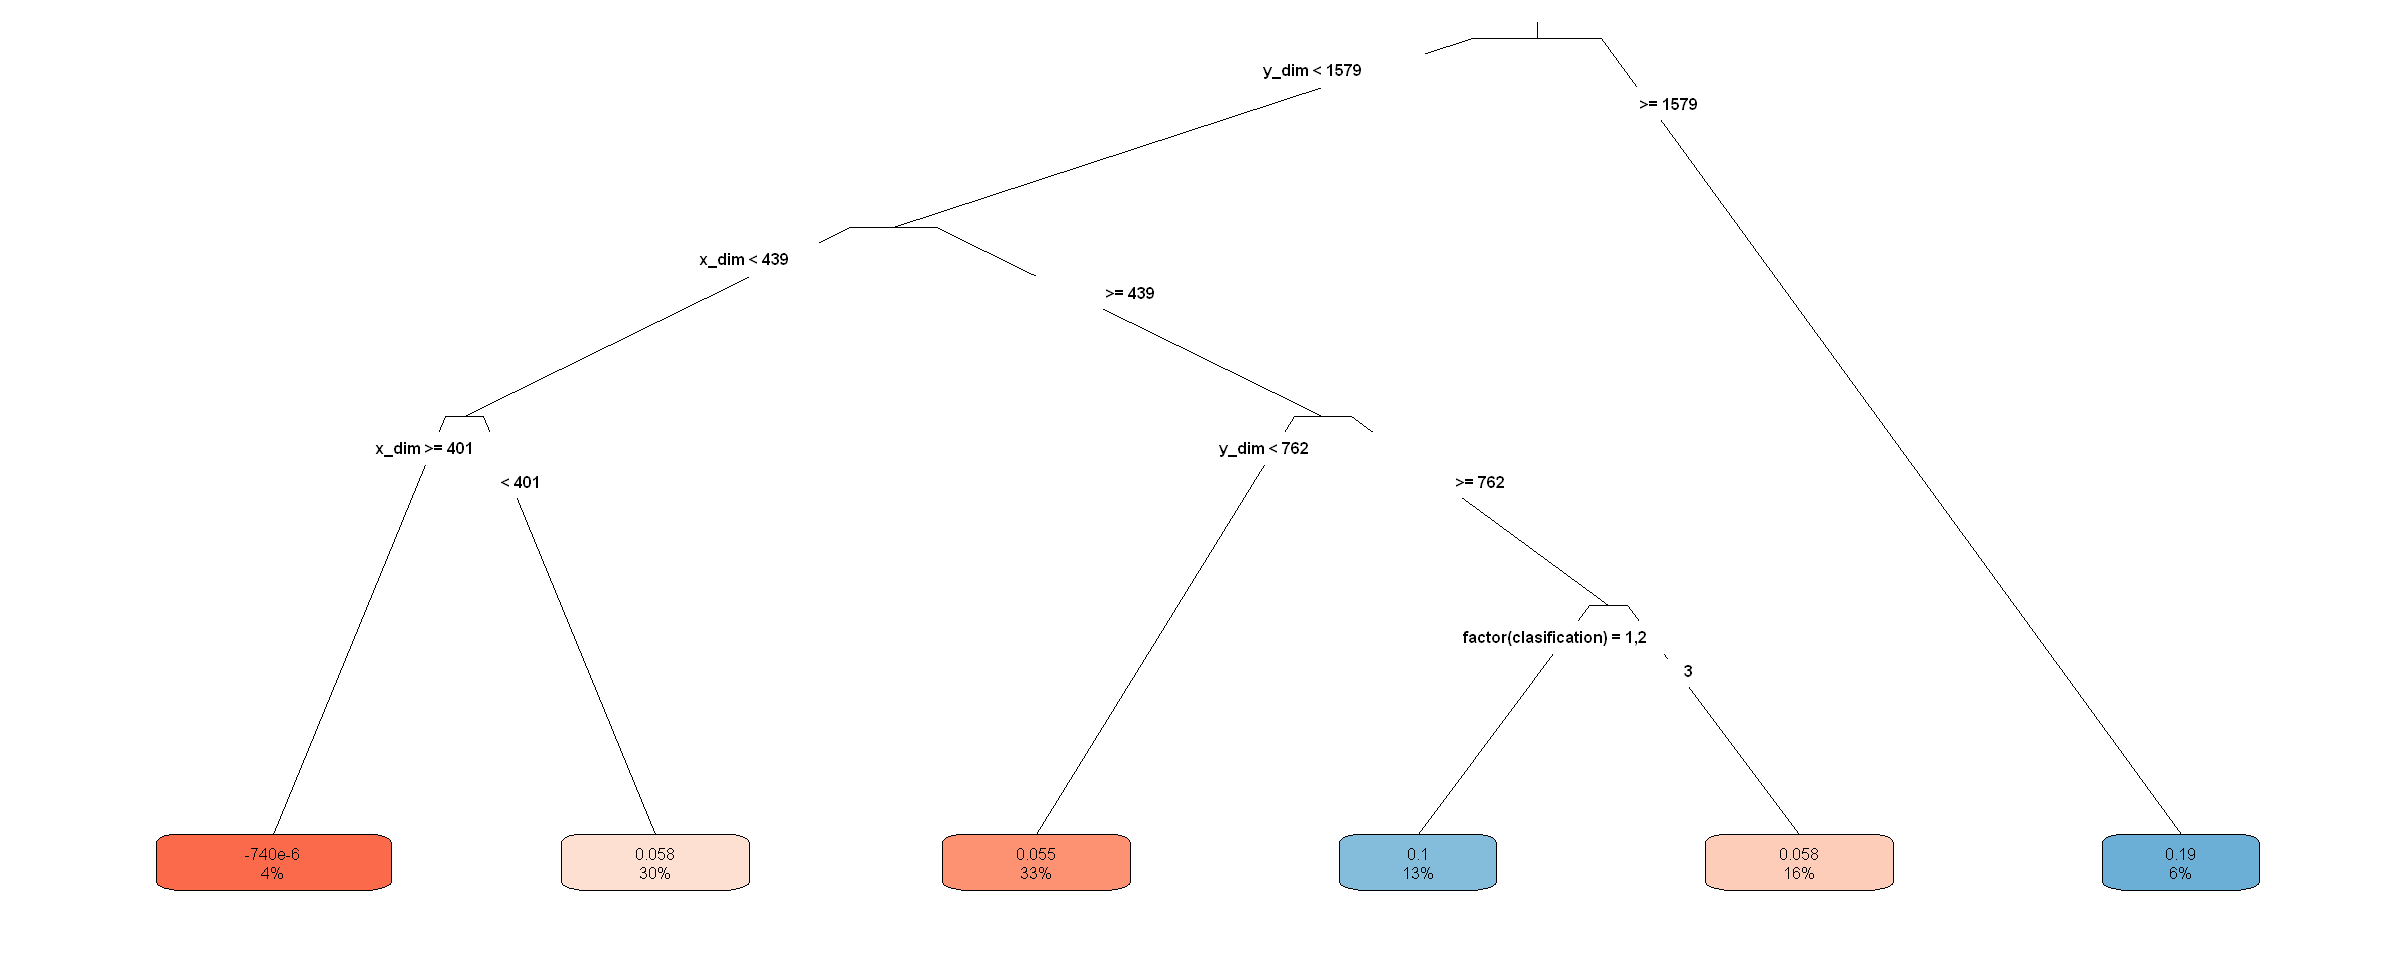

In [545]:
options(repr.plot.width=20, repr.plot.height=8)
rpart.plot(
  x=ct.pruned,        # Pruned tree
  type=3,             # Draw separate split labels for the left and right directions
  fallen=TRUE,        # Position the leaf nodes at the bottom of the graph
  leaf.round=1,       # Rounding of the corners of the leaf node boxes
  extra=100,          # Display the percentage of observations in the node
  branch=.1,          # Shape of the branch lines
  box.palette="RdBu", # Palette for coloring the node
  cex = 0.8,
  xcompact=FALSE,
  ycompact=FALSE)

# Using Lat and Longitud

In [562]:
covariates = c("tenured", "level", "sex", "age", "clasification", 
               "cpelec", "cpwater", "nlat_ie", "nlong_ie")
# fmla <- formula(stay ~  tenured + sex + age + 
#                         factor(level) + factor(clasification)
#                         + cpelec + cpwater + nlat_ie + nlong_ie)
fmla <- paste(outcome, " ~", paste(covariates, collapse = " + "))

fmla

[1] "stay  ~ tenured + level + sex + age + clasification + cpelec + cpwater + nlat_ie + nlong_ie"

[1] 2
[1] "CT"


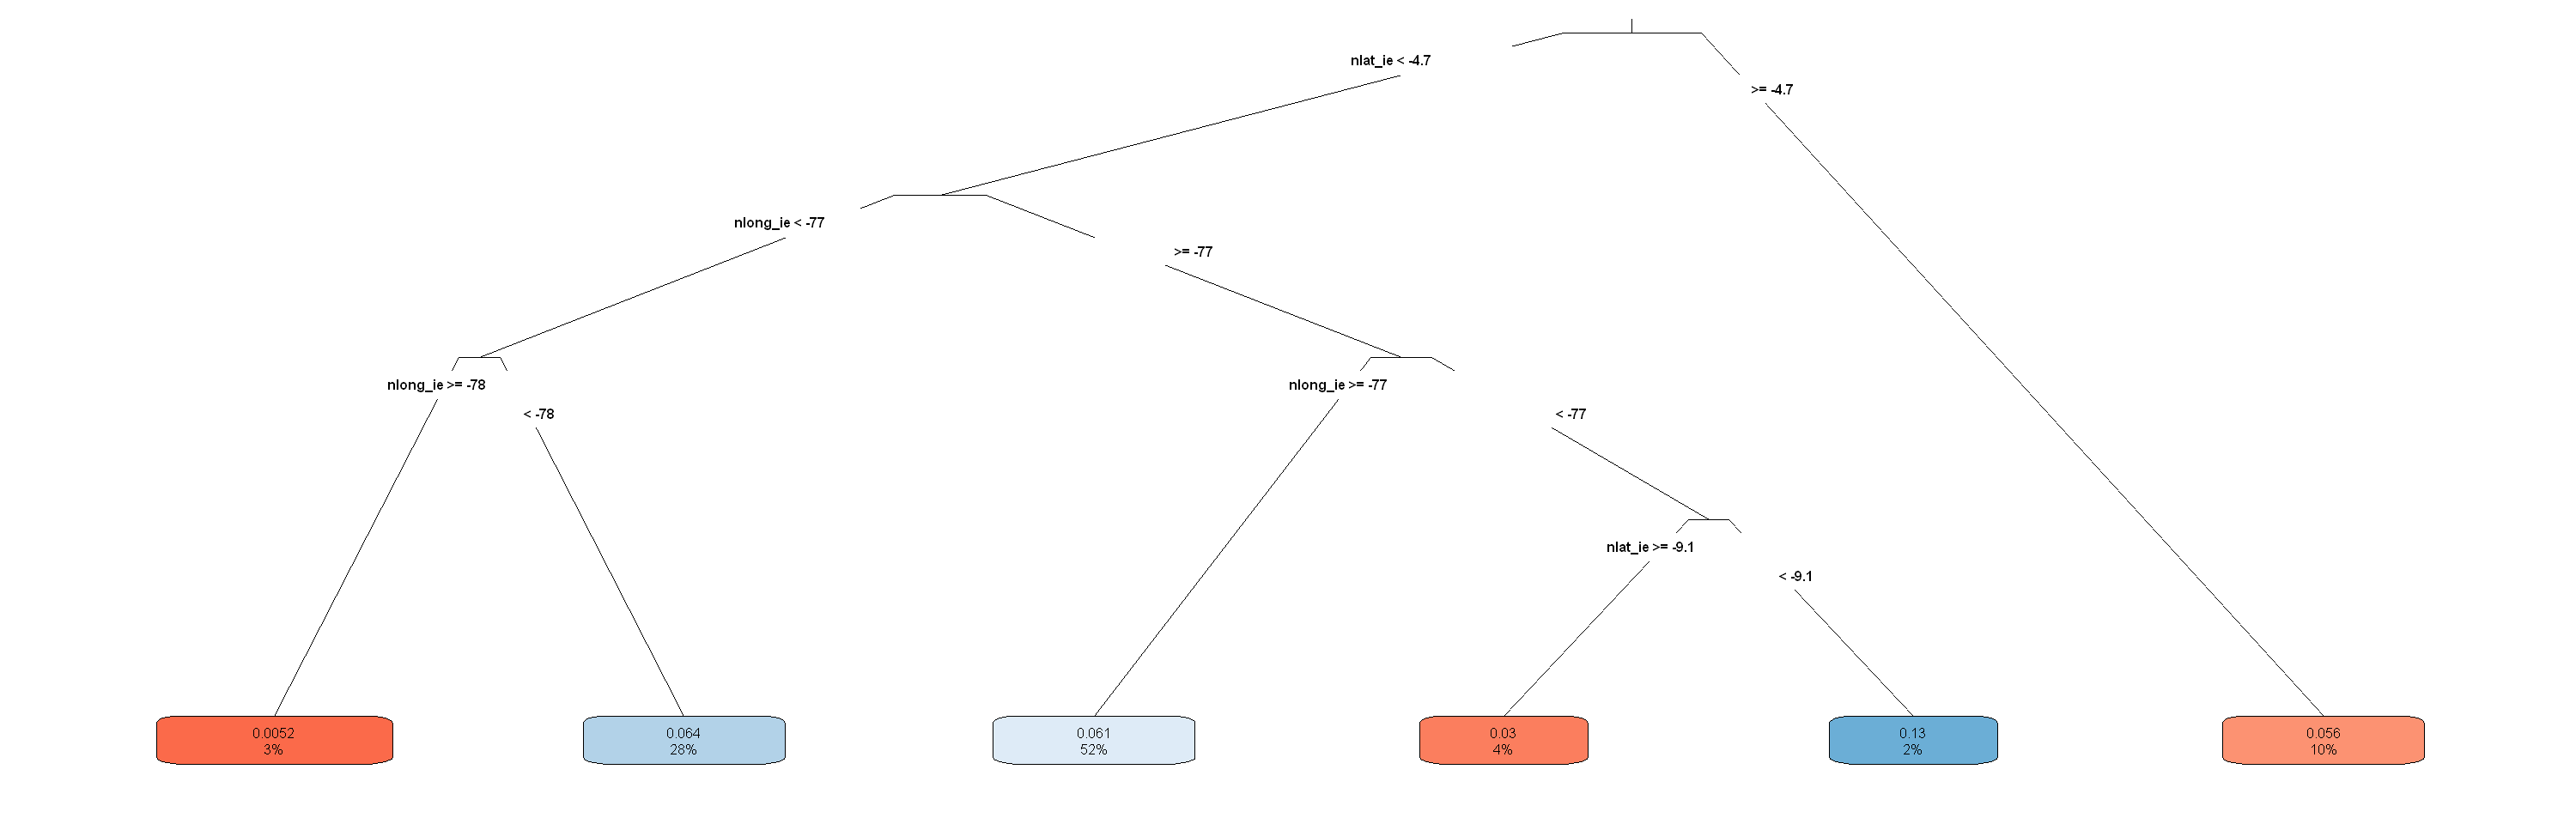

In [549]:
# Fitting the forest
ct.unpruned <- honest.causalTree(
  formula=fmla,            # Define the model
  data=data_clean[indices$split,],
  treatment=data_clean[indices$split, treatment],
  est_data=data_clean[indices$est,],
  est_treatment=data_clean[indices$est, treatment],
  minsize=120,                 # Min. number of treatment and control cases in each leaf
  HonestSampleSize=length(indices$est), #  Num obs used in estimation after splitting
  # We recommend not changing the parameters below
  split.Rule="CT",            # Define the splitting option
  cv.option="TOT",            # Cross validation options
  cp=0,                       # Complexity parameter
  split.Honest=TRUE,          # Use honesty when splitting
  cv.Honest=TRUE              # Use honesty when performing cross-validation
)

# Table of cross-validated values by tuning parameter.
ct.cptable <- as.data.frame(ct.unpruned$cptable)

# Obtain optimal complexity parameter to prune tree.
cp.selected <- which.min(ct.cptable$xerror)
cp.optimal <- ct.cptable[cp.selected, "CP"]

# Prune the tree at optimal complexity parameter.
ct.pruned <- prune(tree=ct.unpruned, cp=cp.optimal)

# Predict point estimates (on estimation sample)
tau.hat.est <- predict(ct.pruned, newdata=data_clean[indices$est,])

# Create a factor column 'leaf' indicating leaf assignment in the estimation set
num.leaves <- length(unique(tau.hat.est))
leaf <- factor(tau.hat.est, levels=sort(unique(tau.hat.est)), labels = seq(num.leaves))

options(repr.plot.width=25, repr.plot.height=8)
plot <- rpart.plot(
  x=ct.pruned,        # Pruned tree
  type=3,             # Draw separate split labels for the left and right directions
  fallen=TRUE,        # Position the leaf nodes at the bottom of the graph
  leaf.round=1,       # Rounding of the corners of the leaf node boxes
  extra=100,          # Display the percentage of observations in the node
  branch=.1,          # Shape of the branch lines
  box.palette="RdBu", # Palette for coloring the node
  cex = 0.8,
  xcompact=FALSE,
  ycompact=FALSE)

In [31]:
# # Dividing data into three subsets
# indices <- split(seq(nrow(data_clean_2016)), sort(seq(nrow(data_clean_2016)) %% 3))
# names(indices) <- c('split', 'est', 'test')

In [32]:
# fmla <- formula(stay ~  tenured + sex + age + 
#                         factor(level) + factor(clasification)
#                         + cpelec + cpwater )

# # Fitting the forest
# ct.unpruned <- honest.causalTree(
#   formula=fmla,            # Define the model
#   data=data_clean_2016[indices$split,],
#   treatment=data_clean_2016[indices$split, treatment],
#   est_data=data_clean_2016[indices$est,],
#   est_treatment=data_clean_2016[indices$est, treatment],
#   minsize=1,                 # Min. number of treatment and control cases in each leaf
#   HonestSampleSize=length(indices$est), #  Num obs used in estimation after splitting
#   # We recommend not changing the parameters below
#   split.Rule="CT",            # Define the splitting option
#   cv.option="TOT",            # Cross validation options
#   cp=0,                       # Complexity parameter
#   split.Honest=TRUE,          # Use honesty when splitting
#   cv.Honest=TRUE              # Use honesty when performing cross-validation
# )

# # Table of cross-validated values by tuning parameter.
# ct.cptable <- as.data.frame(ct.unpruned$cptable)

# # Obtain optimal complexity parameter to prune tree.
# cp.selected <- which.min(ct.cptable$xerror)
# cp.optimal <- ct.cptable[cp.selected, "CP"]

# # Prune the tree at optimal complexity parameter.
# ct.pruned <- prune(tree=ct.unpruned, cp=cp.optimal)

# # Predict point estimates (on estimation sample)
# tau.hat.est <- predict(ct.pruned, newdata=data_clean_2016[indices$est,])

# # Create a factor column 'leaf' indicating leaf assignment in the estimation set
# num.leaves <- length(unique(tau.hat.est))
# leaf <- factor(tau.hat.est, levels=sort(unique(tau.hat.est)), labels = seq(num.leaves))

# rpart.plot(
#   x=ct.pruned,        # Pruned tree
#   type=3,             # Draw separate split labels for the left and right directions
#   fallen=TRUE,        # Position the leaf nodes at the bottom of the graph
#   leaf.round=1,       # Rounding of the corners of the leaf node boxes
#   extra=100,          # Display the percentage of observations in the node
#   branch=.1,          # Shape of the branch lines
#   box.palette="RdBu") # Palette for coloring the node

In [33]:
# Assuming discontinuity generates RCT

In [550]:
# Auxiliary function to computes adjusted p-values 
# following the Romano-Wolf method.
# For a reference, see http://ftp.iza.org/dp12845.pdf page 8
#  t.orig: vector of t-statistics from original model
#  t.boot: matrix of t-statistics from bootstrapped models
romano_wolf_correction <- function(t.orig, t.boot) {
  abs.t.orig <- abs(t.orig)
  abs.t.boot <- abs(t.boot)
  abs.t.sorted <- sort(abs.t.orig, decreasing = TRUE)

  max.order <- order(abs.t.orig, decreasing = TRUE)
  rev.order <- order(max.order)

  M <- nrow(t.boot)
  S <- ncol(t.boot)

  p.adj <- rep(0, S)
  p.adj[1] <- mean(apply(abs.t.boot, 1, max) > abs.t.sorted[1])
  for (s in seq(2, S)) {
    cur.index <- max.order[s:S]
    p.init <- mean(apply(abs.t.boot[, cur.index, drop=FALSE], 1, max) > abs.t.sorted[s])
    p.adj[s] <- max(p.init, p.adj[s-1])
  }
  p.adj[rev.order]
}

# Computes adjusted p-values for linear regression (lm) models.
#    model: object of lm class (i.e., a linear reg model)
#    indices: vector of integers for the coefficients that will be tested
#    cov.type: type of standard error (to be passed to sandwich::vcovHC)
#    num.boot: number of null bootstrap samples. Increase to stabilize across runs.
# Note: results are probabilitistic and may change slightly at every run. 
#
# Adapted from the p_adjust from from the hdm package, written by Philipp Bach.
# https://github.com/PhilippBach/hdm_prev/blob/master/R/p_adjust.R
summary_rw_lm <- function(model, indices=NULL, cov.type="HC2", num.boot=10000) {

  if (is.null(indices)) {
    indices <- 1:nrow(coef(summary(model)))
  }
  # Grab the original t values.
  summary <- coef(summary(model))[indices,,drop=FALSE]
  t.orig <- summary[, "t value"]

  # Null resampling.
  # This is a trick to speed up bootstrapping linear models.
  # Here, we don't really need to re-fit linear regressions, which would be a bit slow.
  # We know that betahat ~ N(beta, Sigma), and we have an estimate Sigmahat.
  # So we can approximate "null t-values" by
  #  - Draw beta.boot ~ N(0, Sigma-hat) --- note the 0 here, this is what makes it a *null* t-value.
  #  - Compute t.boot = beta.boot / sqrt(diag(Sigma.hat))
  Sigma.hat <- vcovHC(model, type=cov.type)[indices, indices]
  se.orig <- sqrt(diag(Sigma.hat))
  num.coef <- length(se.orig)
  beta.boot <- mvrnorm(n=num.boot, mu=rep(0, num.coef), Sigma=Sigma.hat)
  t.boot <- sweep(beta.boot, 2, se.orig, "/")
  p.adj <- romano_wolf_correction(t.orig, t.boot)

  result <- cbind(summary[,c(1,2,4),drop=F], p.adj)
  colnames(result) <- c('Estimate', 'Std. Error', 'Orig. p-value', 'Adj. p-value')
  result
}

In [551]:
# This is only valid in randomized datasets.
fmla <- paste0(outcome, ' ~ ', paste0(treatment, '* leaf'))
if (num.leaves == 1) {
  print("Skipping since there's a single leaf.")

} else if (num.leaves == 2) {
  # if there are only two leaves, no need to correct for multiple hypotheses
  ols <- lm(fmla, data=transform(data[indices$est,], leaf=leaf))
  coeftest(ols, vcov=vcovHC(ols, 'HC2'))[4,,drop=F]

} else {
  # if there are three or more leaves, use Romano-Wolf test correction 
  ols <- lm(fmla, data=transform(data[indices$est,], leaf=leaf))
  interact <- which(sapply(names(coef(ols)), function(x) grepl(paste0(treatment, ":"), x)))
  summary_rw_lm(ols, indices=interact, cov.type = 'HC2')
}

,Estimate,Std. Error,Orig. p-value,Adj. p-value
treat12:leaf2,0.099243629,0.07876903,0.2077344,0.4750
treat12:leaf3,-0.029849596,0.06693069,0.6556266,0.9149
treat12:leaf4,-0.040622018,0.06073097,0.5035903,0.8085
treat12:leaf5,-0.013220663,0.06212008,0.8314700,0.9622
treat12:leaf6,-0.005272767,0.09227001,0.9544313,0.9622


In [36]:
# data 

# Average Covariate values wihtin each leaf

In [555]:
covariates = c("tenured", "sex", "age", "cpelec", "cpwater", "nlat_ie", "nlong_ie")

In [556]:
data <- data_clean

In [39]:
# covariate = "clasification"

# fmla <- formula(paste0(covariate, "~ 0 + leaf"))
# ols <- lm(fmla, data=transform(data[indices$est,], leaf=leaf))
# ols.res <- coeftest(ols, vcov=vcovHC(ols, "HC2"))

# # Retrieve results
# avg <- ols.res[,1]
# stderr <- ols.res[,2]

# # Tally up results
# data.frame(covariate, avg, stderr, leaf=paste0("Leaf", seq(num.leaves)), 
#          # Used for coloring
#          scaling=pnorm((avg - mean(avg))/sd(avg)), 
#          # We will order based on how much variation is 'explain' by the averages
#          # relative to the total variation of the covariate in the data
#          variation=sd(avg) / sd(data[,covariate]),
#          # String to print in each cell in heatmap below
#          labels=paste0(signif(avg, 3), "\n", "(", signif(stderr, 3), ")"))

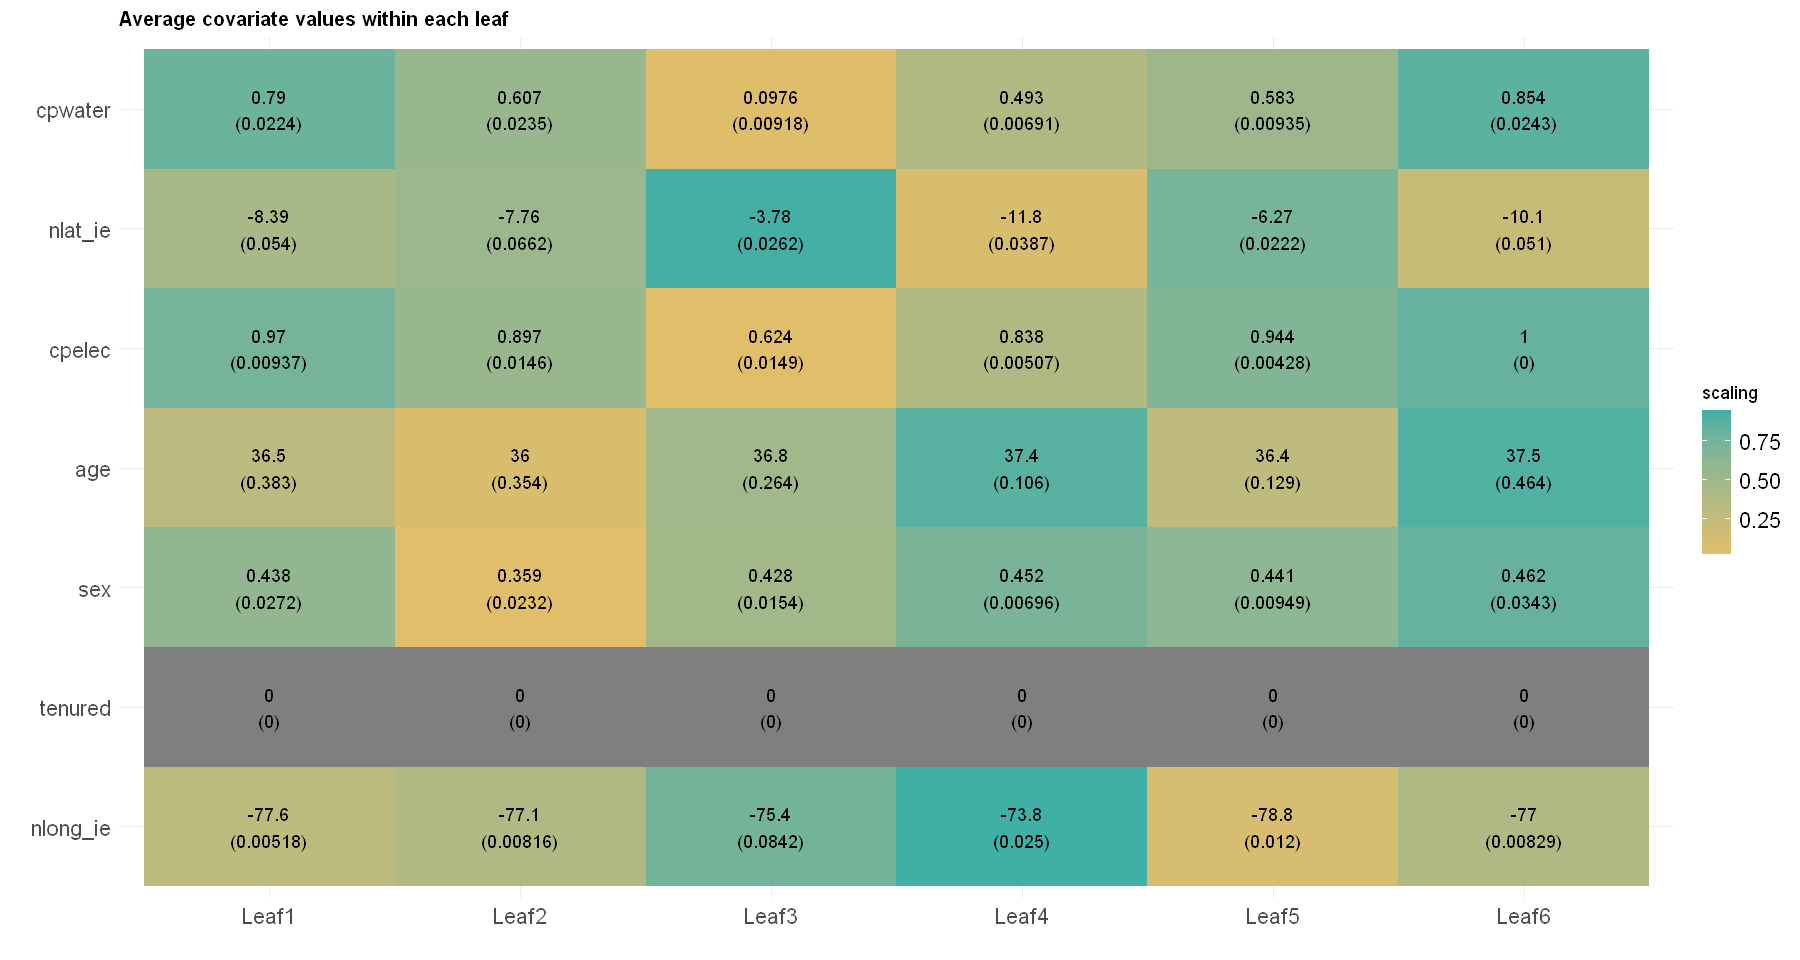

In [557]:
df <- mapply(function(covariate) {
      # Looping over covariate names
      # Compute average covariate value per leaf (with correct standard errors)
      fmla <- formula(paste0(covariate, "~ 0 + leaf"))
      ols <- lm(fmla, data=transform(data[indices$est,], leaf=leaf))
      ols.res <- coeftest(ols, vcov=vcovHC(ols, "HC2"))
    
      # Retrieve results
      avg <- ols.res[,1]
      stderr <- ols.res[,2]
      
      # Tally up results
      data.frame(covariate, avg, stderr, leaf=paste0("Leaf", seq(num.leaves)), 
                 # Used for coloring
                 scaling=pnorm((avg - mean(avg))/sd(avg)), 
                 # We will order based on how much variation is 'explain' by the averages
                 # relative to the total variation of the covariate in the data
                 variation=sd(avg) / sd(data[,covariate]),
                 # String to print in each cell in heatmap below
                 labels=paste0(signif(avg, 3), "\n", "(", signif(stderr, 3), ")"))
}, covariates, SIMPLIFY = FALSE)

df <- do.call(rbind, df)

# a small optional trick to ensure heatmap will be in decreasing order of 'variation'
df$covariate <- reorder(df$covariate, order(df$variation))


# plot heatmap
options(repr.plot.width=15, repr.plot.height=8)
ggplot(df) + 
    aes(leaf, covariate, fig(50,50)) +
    geom_tile(aes(fill = scaling)) + 
    geom_text(aes(label = labels)) +
    scale_fill_gradient(low = "#E1BE6A", high = "#40B0A6") +
    ggtitle(paste0("Average covariate values within each leaf")) +
    theme_minimal() + 
    ylab("") + xlab("") +
    theme(plot.title = element_text(size = 12, face = "bold"),
          axis.text=element_text(size=13), 
          legend.text = element_text(size=13)) 

# Via grf

## 1. Using LATITUDE and LONGITUDE

In [565]:
covariates = c("tenured", "sex", "age", "cpelec", "cpwater", "nlat_ie", "nlong_ie")

fmla <- formula(stay ~  tenured + sex + age + 
                        factor(level) + factor(clasification)
                        + cpelec + cpwater + nlat_ie + nlong_ie)

covariates = c("tenured", "level", "sex", "age", "clasification", 
               "cpelec", "cpwater", "nlat_ie", "nlong_ie")

# fmla <- paste(outcome, " ~", paste(covariates, collapse = " + "))

fmla

stay ~ tenured + sex + age + factor(level) + factor(clasification) + 
    cpelec + cpwater + nlat_ie + nlong_ie

In [566]:
# Preparing data to fit a causal forest
# fmla <- formula(paste0("~ 0 +", paste0(covariates, collapse="+")))
XX <- model.matrix(fmla, data)
W <- data[,treatment]
Y <- data[,outcome]

In [567]:
forest.tau <- causal_forest(XX, Y, W)

In [568]:
# Get predictions from forest fitted above.
tau.hat <- predict(forest.tau)$predictions  # tau(X) estimates

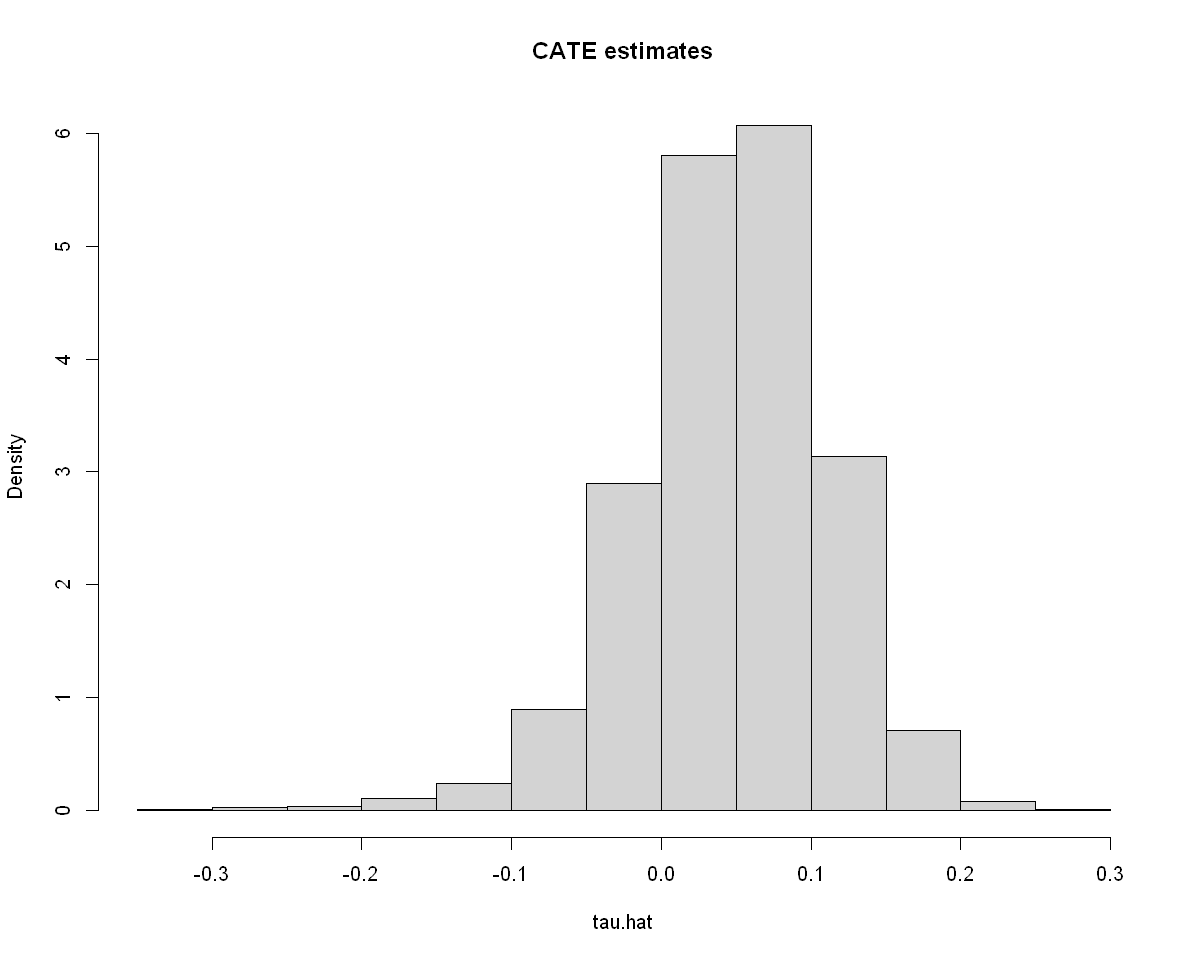

In [569]:
options(repr.plot.width=10, repr.plot.height=8)
# Do not use this for assessing heterogeneity. See text above.
hist(tau.hat, main="CATE estimates", freq=F)

### Data-driven subgroups

In [570]:
# Valid randomized data and observational data with unconfoundedness+overlap.
# Note: read the comments below carefully. 
# In randomized settings, do not estimate forest.e and e.hat; use known assignment probs.

# Prepare dataset
fmla <- formula(stay ~  tenured + sex + age + 
                        factor(level) + factor(clasification)
                        + cpelec + cpwater + nlat_ie + nlong_ie)
X <- model.matrix(fmla, data)
W <- data[,treatment]
Y <- data[,outcome]
n <- nrow(data)

# Number of rankings that the predictions will be ranking on 
# (e.g., 2 for above/below median estimated CATE, 5 for estimated CATE quintiles, etc.)
num.rankings <- 5  

# Prepare for data.splitting
# Assign a fold number to each observation.
# The argument 'clusters' in the next step will mimick K-fold cross-fitting.
num.folds <- 10
folds <- sort(seq(n) %% num.folds) + 1

# Comment or uncomment depending on your setting.
# Observational setting with unconfoundedness+overlap (unknown assignment probs):
# forest <- causal_forest(X, Y, W, clusters = folds)
# Randomized settings with fixed and known probabilities (here: 0.5).
forest <- causal_forest(X, Y, W, W.hat=.5, clusters = folds)

# Retrieve out-of-bag predictions.
# Predictions for observation in fold k will be computed using 
# trees that were not trained using observations for that fold.
tau.hat <- predict(forest)$predictions


# Rank observations *within each fold* into quintiles according to their CATE predictions.
ranking <- rep(NA, n)
for (fold in seq(num.folds)) {
  tau.hat.quantiles <- quantile(tau.hat[folds == fold], probs = seq(0, 1, by=1/num.rankings))
  ranking[folds == fold] <- cut(tau.hat[folds == fold], tau.hat.quantiles, include.lowest=TRUE,labels=seq(num.rankings))
}

In [571]:
# Valid only in randomized settings.
# Average difference-in-means within each ranking

# Formula y ~ 0 + ranking + ranking:w
fmla <- paste0(outcome, " ~ 0 + ranking + ranking:", treatment)
ols.ate <- lm(fmla, data=transform(data, ranking=factor(ranking)))
ols.ate <- coeftest(ols.ate, vcov=vcovHC(ols.ate, type='HC2'))
interact <- which(grepl(":", rownames(ols.ate)))
ols.ate <- data.frame("ols", paste0("Q", seq(num.rankings)), ols.ate[interact, 1:2])
rownames(ols.ate) <- NULL # just for display
colnames(ols.ate) <- c("method", "ranking", "estimate", "std.err")
ols.ate

method,ranking,estimate,std.err
<chr>,<chr>,<dbl>,<dbl>
ols,Q1,-0.005137468,0.01206446
ols,Q2,0.037187819,0.01172328
ols,Q3,0.045392324,0.01206480
ols,Q4,0.069808814,0.01212217
ols,Q5,0.064567665,0.01193322


In [572]:
# Computing AIPW scores.
tau.hat <- predict(forest)$predictions
e.hat <- forest$W.hat # P[W=1|X]
m.hat <- forest$Y.hat # E[Y|X]

# Estimating mu.hat(X, 1) and mu.hat(X, 0) for obs in held-out sample
# Note: to understand this, read equations 6-8 in this vignette:
# https://grf-labs.github.io/grf/articles/muhats.html
mu.hat.0 <- m.hat - e.hat * tau.hat        # E[Y|X,W=0] = E[Y|X] - e(X)*tau(X)
mu.hat.1 <- m.hat + (1 - e.hat) * tau.hat  # E[Y|X,W=1] = E[Y|X] + (1 - e(X))*tau(X)

# AIPW scores
aipw.scores <- tau.hat + W / e.hat * (Y -  mu.hat.1) - (1 - W) / (1 - e.hat) * (Y -  mu.hat.0)
ols <- lm(aipw.scores ~ 0 + factor(ranking))
forest.ate <- data.frame("aipw", paste0("Q", seq(num.rankings)), coeftest(ols, vcov=vcovHC(ols, "HC2"))[,1:2])
colnames(forest.ate) <- c("method", "ranking", "estimate", "std.err")
rownames(forest.ate) <- NULL # just for display
forest.ate

method,ranking,estimate,std.err
<chr>,<chr>,<dbl>,<dbl>
aipw,Q1,-0.0005554625,0.01155249
aipw,Q2,0.0281562123,0.01133659
aipw,Q3,0.0300664694,0.01149972
aipw,Q4,0.0472143750,0.01156416
aipw,Q5,0.0317152348,0.01147548


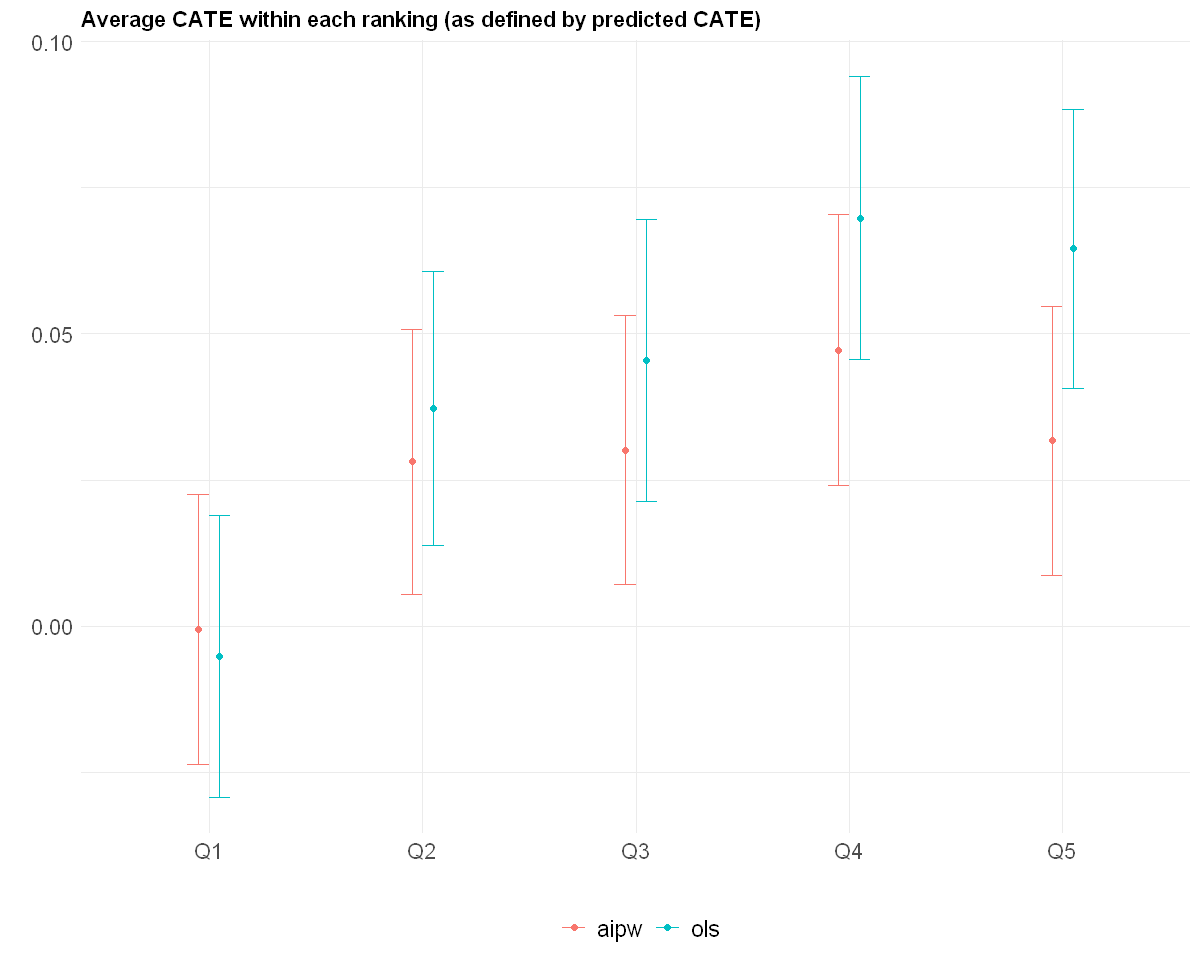

In [573]:
# Concatenate the two results.
res <- rbind(forest.ate, ols.ate)

# Plotting the point estimate of average treatment effect 
# and 95% confidence intervals around it.
options(repr.plot.width=10, repr.plot.height=8)
ggplot(res) +
  aes(x = ranking, y = estimate, group=method, color=method, fig(50,50)) + 
  geom_point(position=position_dodge(0.2)) +
  geom_errorbar(aes(ymin=estimate-2*std.err, ymax=estimate+2*std.err), width=.2, position=position_dodge(0.2)) +
  ylab("") + xlab("") +
  ggtitle("Average CATE within each ranking (as defined by predicted CATE)") +
  theme_minimal() +
  theme(plot.title = element_text(size = 13, face = "bold"),
        axis.text=element_text(size=13), 
        legend.position="bottom", legend.title = element_blank(), legend.text = element_text(size=14))

### Test predictions using difference-in-means estimator

In [574]:
# Valid in randomized settings only.

# y ~ ranking + w + ranking:w
fmla <- paste0(outcome, "~ ranking + ", treatment, " + ranking:", treatment) 
ols <- lm(fmla, data=transform(data, ranking=factor(ranking)))
interact <- which(sapply(names(coef(ols)), function(x) grepl(":", x)))
res <- summary_rw_lm(ols, indices=interact)
rownames(res) <- paste("Rank", 2:num.rankings, "- Rank 1") # just for display
res

,Estimate,Std. Error,Orig. p-value,Adj. p-value
Rank 2 - Rank 1,0.04232529,0.01698959,1.273492e-02,0.0133
Rank 3 - Rank 1,0.05052979,0.01713643,3.193874e-03,0.0054
Rank 4 - Rank 1,0.07494628,0.01718956,1.305086e-05,0.0000
Rank 5 - Rank 1,0.06970513,0.01712945,4.727373e-05,0.0001


In [575]:
# Valid in randomized and observational settings with unconfoundedness+overlap.

# Using AIPW scores computed above
ols <- lm(aipw.scores ~ 1 + factor(ranking))
res <- summary_rw_lm(ols, indices=2:num.rankings)
rownames(res) <- paste("Rank", 2:num.rankings, "- Rank 1") # just for display
res

,Estimate,Std. Error,Orig. p-value,Adj. p-value
Rank 2 - Rank 1,0.02871167,0.0162412,0.077099650,0.1207
Rank 3 - Rank 1,0.03062193,0.0162412,0.059379181,0.1207
Rank 4 - Rank 1,0.04776984,0.0162412,0.003271167,0.0144
Rank 5 - Rank 1,0.03227070,0.0162412,0.046935441,0.1207


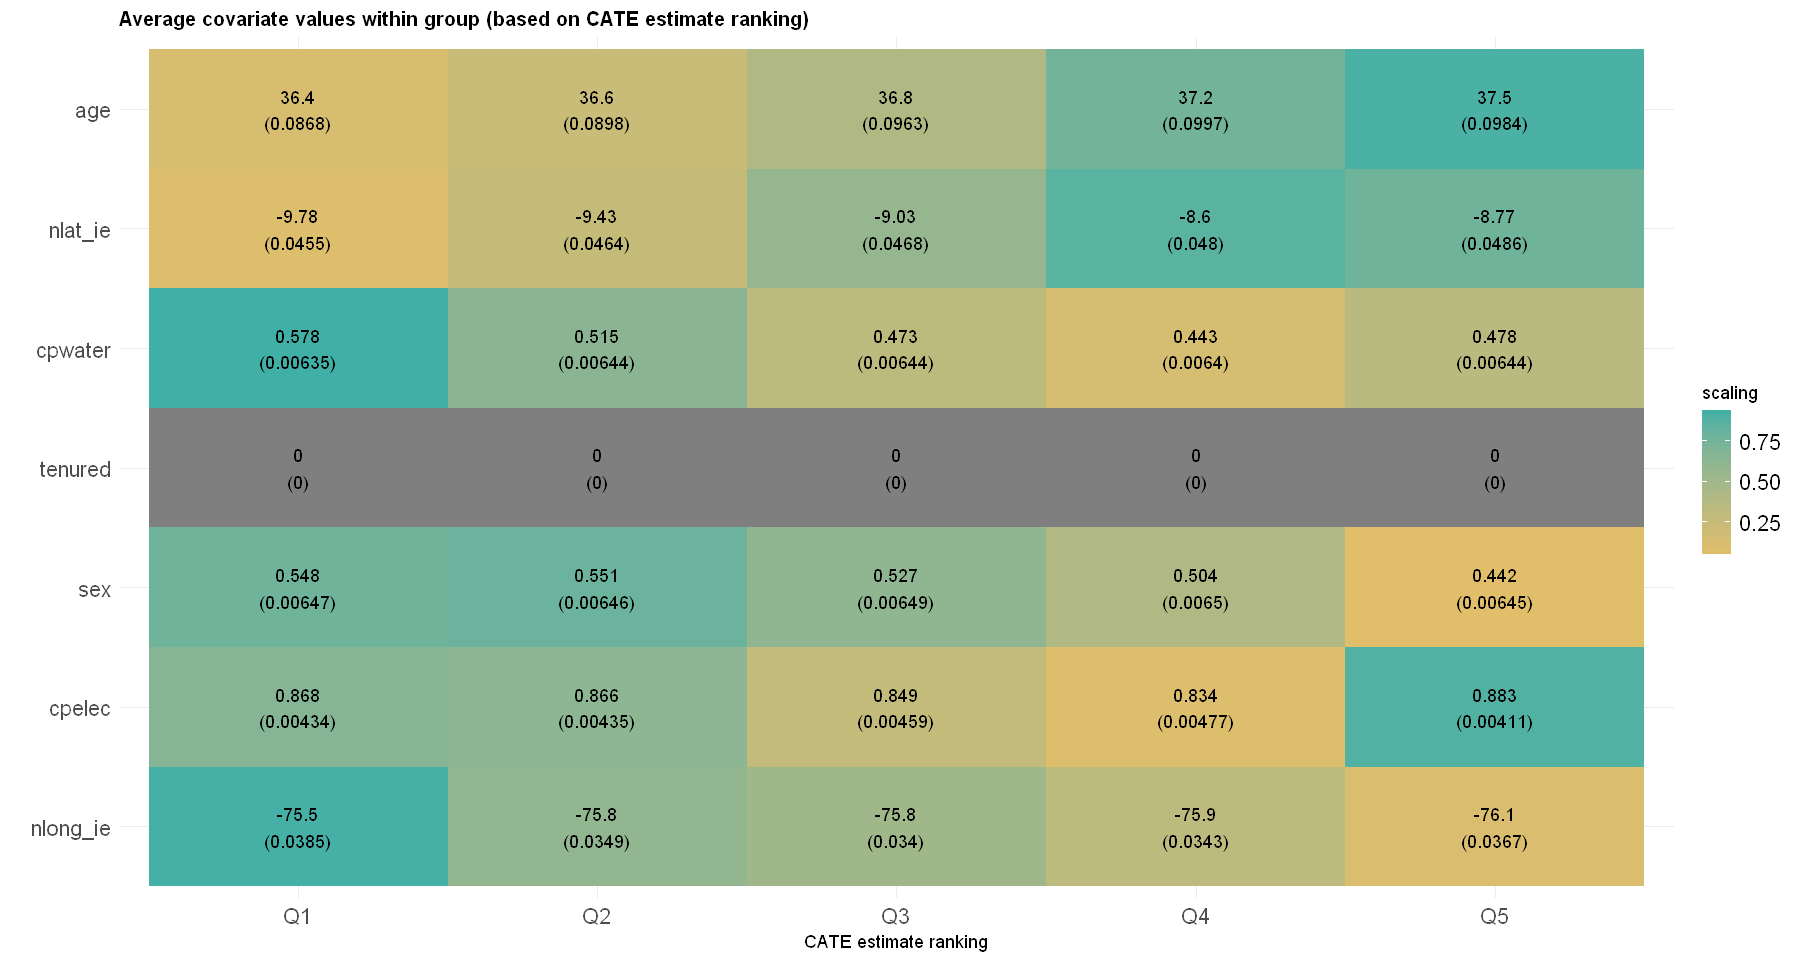

In [576]:
covariates = c("tenured", "sex", "age", "cpelec", "cpwater", "nlat_ie", "nlong_ie")

df <- mapply(function(covariate) {
      # Looping over covariate names
      # Compute average covariate value per ranking (with correct standard errors)
      fmla <- formula(paste0(covariate, "~ 0 + ranking"))
      ols <- lm(fmla, data=transform(data, ranking=factor(ranking)))
      ols.res <- coeftest(ols, vcov=vcovHC(ols, "HC2"))
    
      # Retrieve results
      avg <- ols.res[,1]
      stderr <- ols.res[,2]
      
      # Tally up results
      data.frame(covariate, avg, stderr, ranking=paste0("Q", seq(num.rankings)), 
                 # Used for coloring
                 scaling=pnorm((avg - mean(avg))/sd(avg)), 
                 # We will order based on how much variation is 'explain' by the averages
                 # relative to the total variation of the covariate in the data
                 variation=sd(avg) / sd(data[,covariate]),
                 # String to print in each cell in heatmap below
                 labels=paste0(signif(avg, 3), "\n", "(", signif(stderr, 3), ")"))
}, covariates, SIMPLIFY = FALSE)
df <- do.call(rbind, df)


# a small optional trick to ensure heatmap will be in decreasing order of 'variation'
df$covariate <- reorder(df$covariate, order(df$variation))

options(repr.plot.width=15, repr.plot.height=8)
# plot heatmap
ggplot(df) +
    aes(ranking, covariate) +
    geom_tile(aes(fill = scaling)) + 
    geom_text(aes(label = labels)) +
    scale_fill_gradient(low = "#E1BE6A", high = "#40B0A6") +
    ggtitle(paste0("Average covariate values within group (based on CATE estimate ranking)")) +
    theme_minimal() + 
    ylab("") + xlab("CATE estimate ranking") +
    theme(plot.title = element_text(size = 12, face = "bold"),
          axis.text=element_text(size=13), 
          legend.text = element_text(size=13)) 
options(repr.plot.width=15, repr.plot.height=8)

### Best linear projection

In [577]:
# Best linear projection of the conditional average treatment effect on covariates
best_linear_projection(forest.tau, X)

Warning message in best_linear_projection(forest.tau, X):
"Estimated treatment propensities take values between 0.076 and 1 and in particular get very close to 0 or 1."



Best linear projection of the conditional average treatment effect.
Confidence intervals are cluster- and heteroskedasticity-robust (HC3):

                          Estimate  Std. Error t value Pr(>|t|)   
(Intercept)            -0.16686904  0.41449040 -0.4026 0.687254   
sex                    -0.03554289  0.01312768 -2.7075 0.006784 **
age                     0.00061934  0.00064204  0.9647 0.334727   
factor.level.2         -0.03136310  0.01514036 -2.0715 0.038322 * 
factor.level.3         -0.02875582  0.02149168 -1.3380 0.180907   
factor.clasification.2 -0.00495903  0.01624569 -0.3053 0.760176   
factor.clasification.3 -0.01179509  0.01756092 -0.6717 0.501801   
cpelec                 -0.01411040  0.01992983 -0.7080 0.478948   
cpwater                -0.01997845  0.00994087 -2.0097 0.044469 * 
nlat_ie                -0.00142730  0.00417386 -0.3420 0.732381   
nlong_ie               -0.00326967  0.00525388 -0.6223 0.533727   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.

### Assessing heterogeneity

In [578]:
test_calibration(forest.tau)


Best linear fit using forest predictions (on held-out data)
as well as the mean forest prediction as regressors, along
with one-sided heteroskedasticity-robust (HC3) SEs:

                               Estimate Std. Error t value    Pr(>t)    
mean.forest.prediction          1.00545    0.16462  6.1077 5.118e-10 ***
differential.forest.prediction  0.69272    0.12569  5.5113 1.796e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


### Partial dependence

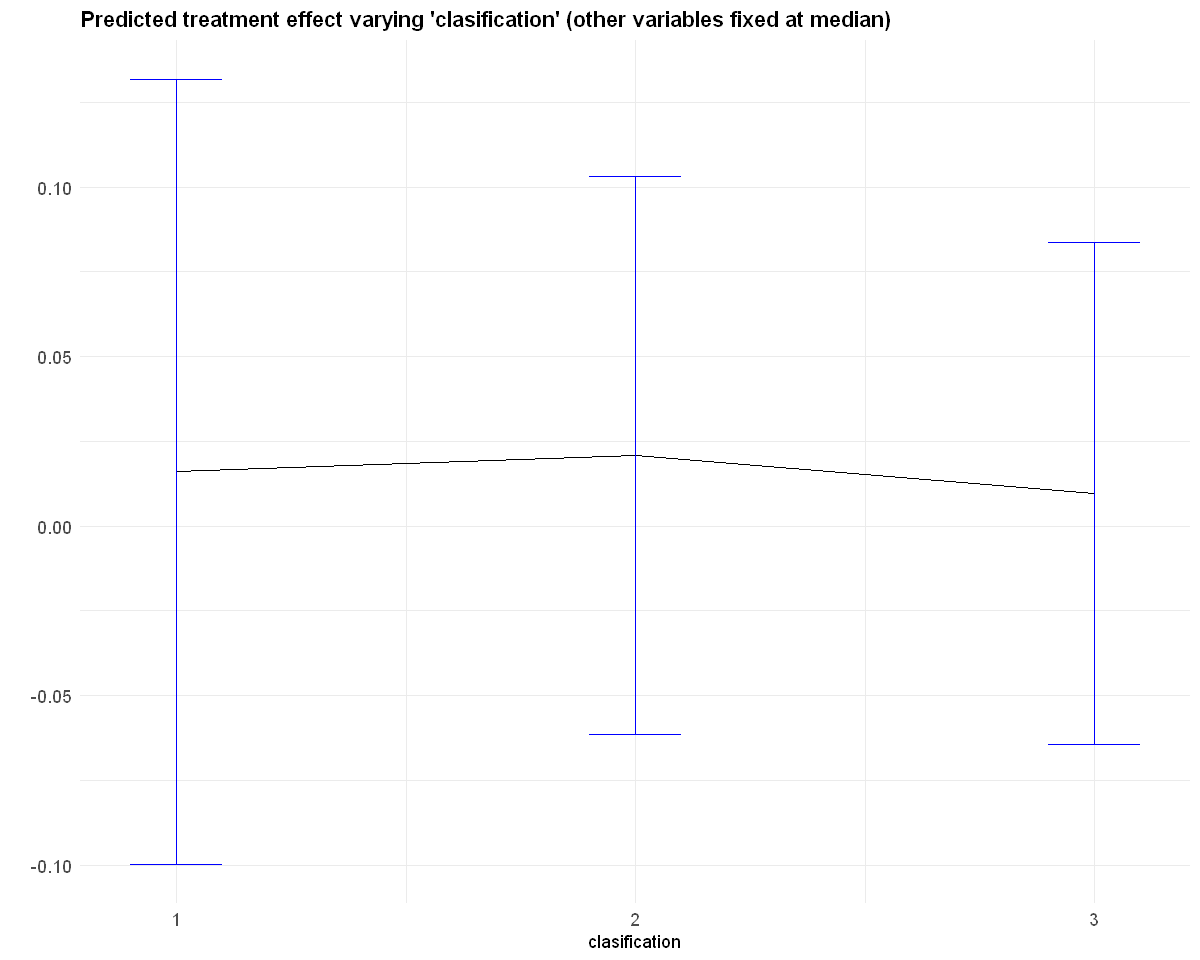

In [587]:
covariates = c("tenured", "sex", "age", "cpelec", "cpwater",  "nlat_ie", "nlong_ie", "clasification", "level")
data[,"clasification"] <- as.integer(as.character(data[,"clasification"]))
data[,"level"] <- as.integer(as.character(data[,"level"]))
selected.covariate <- "clasification"
# other.covariates <- covariates
other.covariates <- covariates[which(covariates != selected.covariate)]

# Fitting a forest 
# (commented for convenience; no need re-fit if already fitted above)
fmla <- formula(paste0("~ 0 + ", paste0(covariates, collapse="+")))
# fmla <- formula(stay ~  tenured + sex + age + 
#                         factor(level) + factor(clasification)
#                         + cpelec + cpwater + x_dim + y_dim)
# Note: For smaller confidence intervals, set num.trees ~ sample size
X <- model.matrix(fmla, data)
W <- data[,treatment]
Y <- data[,outcome]
forest.tau <- causal_forest(X, Y, W, W.hat=.5)  # few trees for speed here

# Compute a grid of values appropriate for the selected covariate
grid.size <- 3 
covariate.grid <- seq(min(data[,selected.covariate]), max(data[,selected.covariate]), length.out=grid.size)

# Other options for constructing a grid:
# For a binary variable, simply use 0 and 1
# grid.size <- 3
# covariate.grid <- c(0,2)  

# For a continuous variable, select appropriate percentiles
# percentiles <- c(1,2,3)
# grid.size <- length(percentiles)
# covariate.grid <- quantile(data[,selected.covariate], probs=percentiles)

# Take median of other covariates 
medians <- apply(data[, other.covariates, F], 2, median)

# Construct a dataset
data.grid <- data.frame(sapply(medians, function(x) rep(x, grid.size)), covariate.grid)
colnames(data.grid) <- c(other.covariates, selected.covariate)


# Expand the data
X.grid <- model.matrix(fmla, data.grid)

# Point predictions of the CATE and standard errors 
forest.pred <- predict(forest.tau, newdata = X.grid, estimate.variance=TRUE)

tau.hat <- forest.pred$predictions
tau.hat.se <- sqrt(forest.pred$variance.estimates)
                               
# Plot predictions for each group and 95% confidence intervals around them.
options(repr.plot.width=10, repr.plot.height=8)
data.pred <- transform(data.grid, tau.hat=tau.hat, ci.low = tau.hat - 2*tau.hat.se, ci.high = tau.hat + 2*tau.hat.se)
ggplot(data.pred) +
  geom_line(aes_string(x=selected.covariate, y="tau.hat", group = 1), color="black") +
  geom_errorbar(aes_string(x=selected.covariate, ymin="ci.low", ymax="ci.high", width=.2), color="blue") +
   ylab("") +
  ggtitle(paste0("Predicted treatment effect varying '", selected.covariate, "' (other variables fixed at median)")) +
  scale_x_continuous("clasification", breaks=covariate.grid, labels=signif(covariate.grid, 2)) +
  theme_minimal() +
  theme(plot.title = element_text(size = 13, face = "bold"),
       axis.text=element_text(size=11)) 

In [588]:
with(data, mean(clasification == 3))

[1] 0.4982098

In [589]:
mean(with(data, (clasification == 3) & (abs(age - median(age)) <= 30))) # at most 3 yrs away

[1] 0.4980747

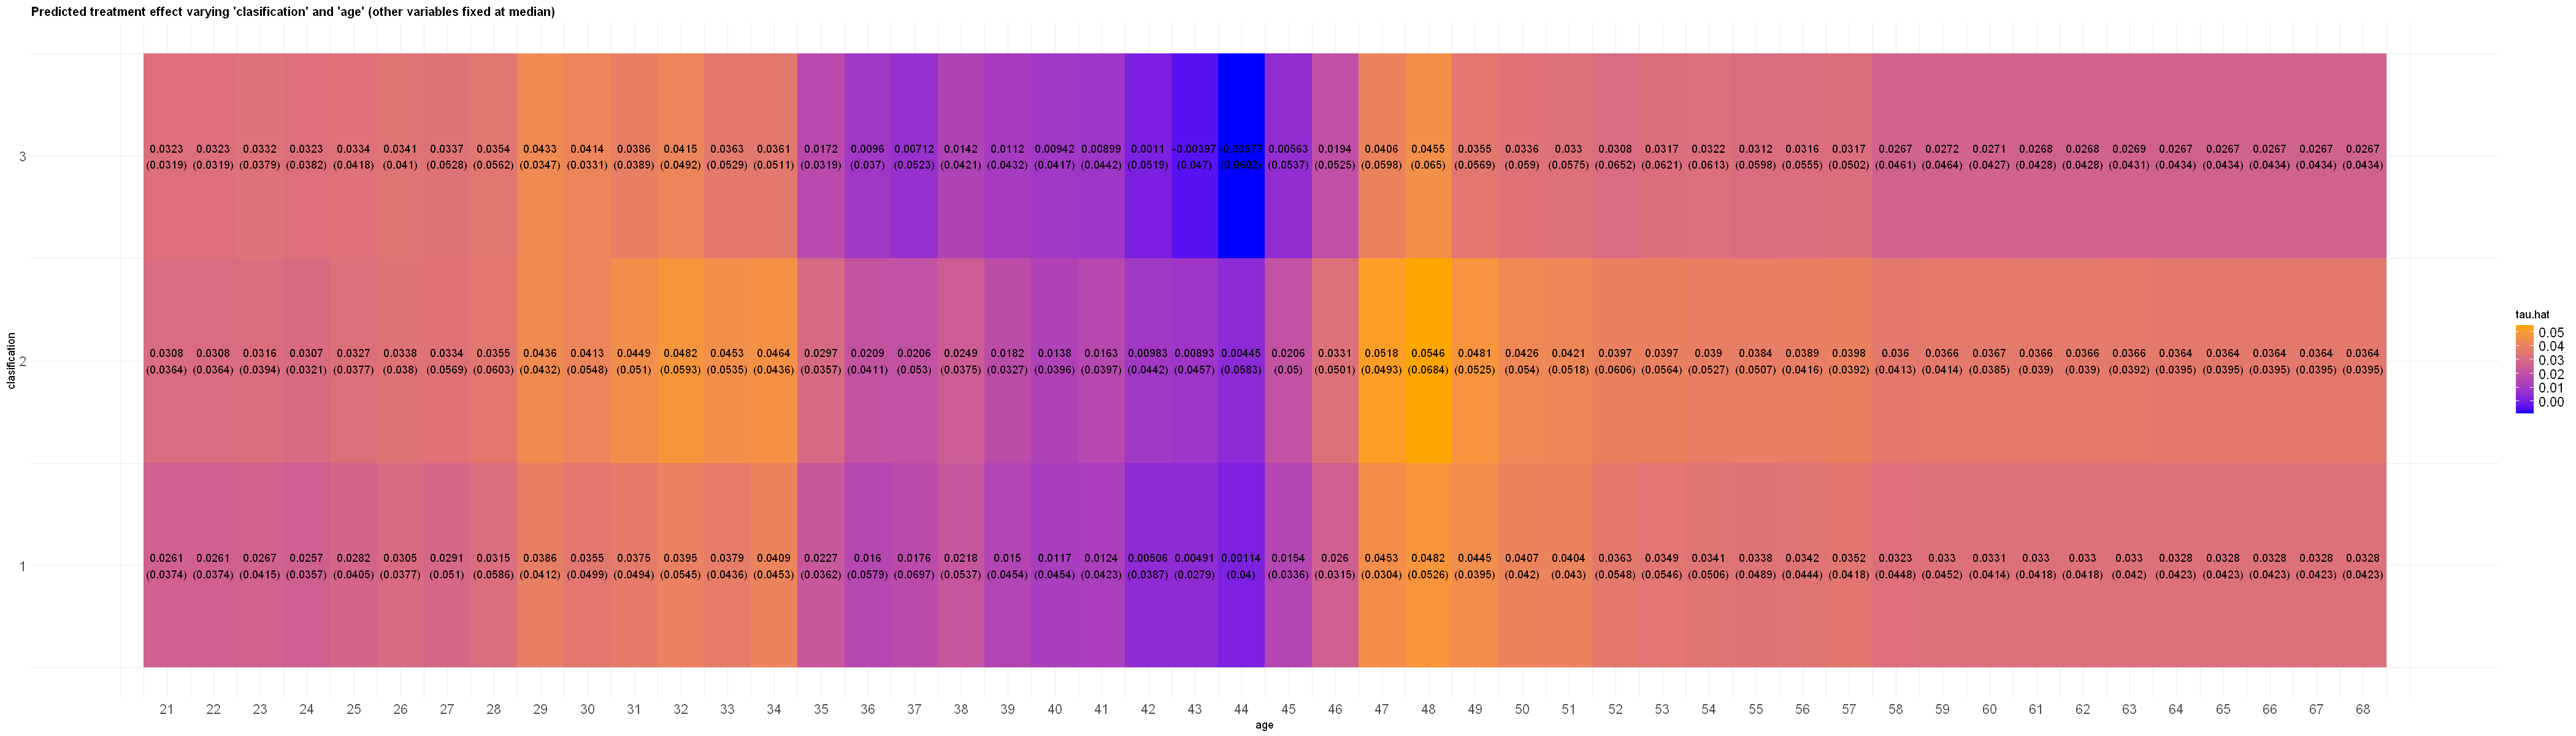

In [590]:
covariates = c("tenured", "sex", "age", "cpelec", "cpwater",  "nlat_ie", "nlong_ie", "clasification", "level")

x1 <- 'clasification'
x2 <- 'age'
selected.covariates <- c(x1, x2)
other.covariates <- covariates[-which(covariates %in% selected.covariates)]

# Compute a grid of values appropriate for the selected covariate
# See other options for constructing grids in the snippet above.
x1.grid.size <- 3
x2.grid.size <- 48

x1.grid <- seq(min(data[,x1]), max(data[,x1]), length.out=x1.grid.size)
x2.grid <- seq(min(data[,x2]), max(data[,x2]), length.out=x2.grid.size)

# Take median of other covariates 
medians <- apply(data[, other.covariates, F], 2, median)

# Construct dataset
data.grid <- data.frame(
                sapply(medians, function(x) rep(x, grid.size)), 
                expand.grid(x1.grid, x2.grid))
colnames(data.grid) <- c(other.covariates, selected.covariates)

# Expand the data according to formula used to fit forest
X.grid <- model.matrix(fmla, data.grid)

# Forest-based point estimates of CATE and standard errors around them
forest.pred <- predict(forest.tau, newdata = X.grid, estimate.variance=TRUE)
tau.hat <- forest.pred$predictions
tau.hat.se <- sqrt(forest.pred$variance.estimates)

# A vector of labels for plotting below
labels <- mapply(function(est, se) paste0(signif(est, 3), "\n", "(", signif(se, 3), ")"), tau.hat, tau.hat.se)
df <- data.frame(X.grid, tau.hat, labels)

# Plotting
options(repr.plot.width=35, repr.plot.height=10)
ggplot(df) +
    aes(age, clasification) +
    geom_tile(aes(fill = tau.hat)) + 
    geom_text(aes(label = labels)) +
    scale_fill_gradient(low = "blue", high = "orange") +
    scale_y_continuous("clasification", breaks=x1.grid, labels=signif(x1.grid, 2)) +
    scale_x_continuous("age", breaks=x2.grid, labels=signif(x2.grid, 2)) +
    ggtitle(paste0("Predicted treatment effect varying '", x1, "' and '", x2, "' (other variables fixed at median)")) +
    theme_minimal() +
    theme(plot.title = element_text(size = 12, face = "bold"),
          axis.text=element_text(size=13), 
          legend.text = element_text(size=13)) 

## 2. Using BLOCKS

In [591]:
covariates = c("tenured", "sex", "age", "cpelec", "cpwater", "x_dim", "y_dim", "clasification", "level")

fmla <- formula(stay ~  tenured + sex + age + 
                        factor(level) + factor(clasification)
                        + cpelec + cpwater + x_dim + y_dim)

In [592]:
# Preparing data to fit a causal forest
# fmla <- formula(paste0("~ 0 +", paste0(covariates, collapse="+")))
XX <- model.matrix(fmla, data)
W <- data[,treatment]
Y <- data[,outcome]

In [593]:
forest.tau <- causal_forest(XX, Y, W)

In [594]:
# Get predictions from forest fitted above.
tau.hat <- predict(forest.tau)$predictions  # tau(X) estimates

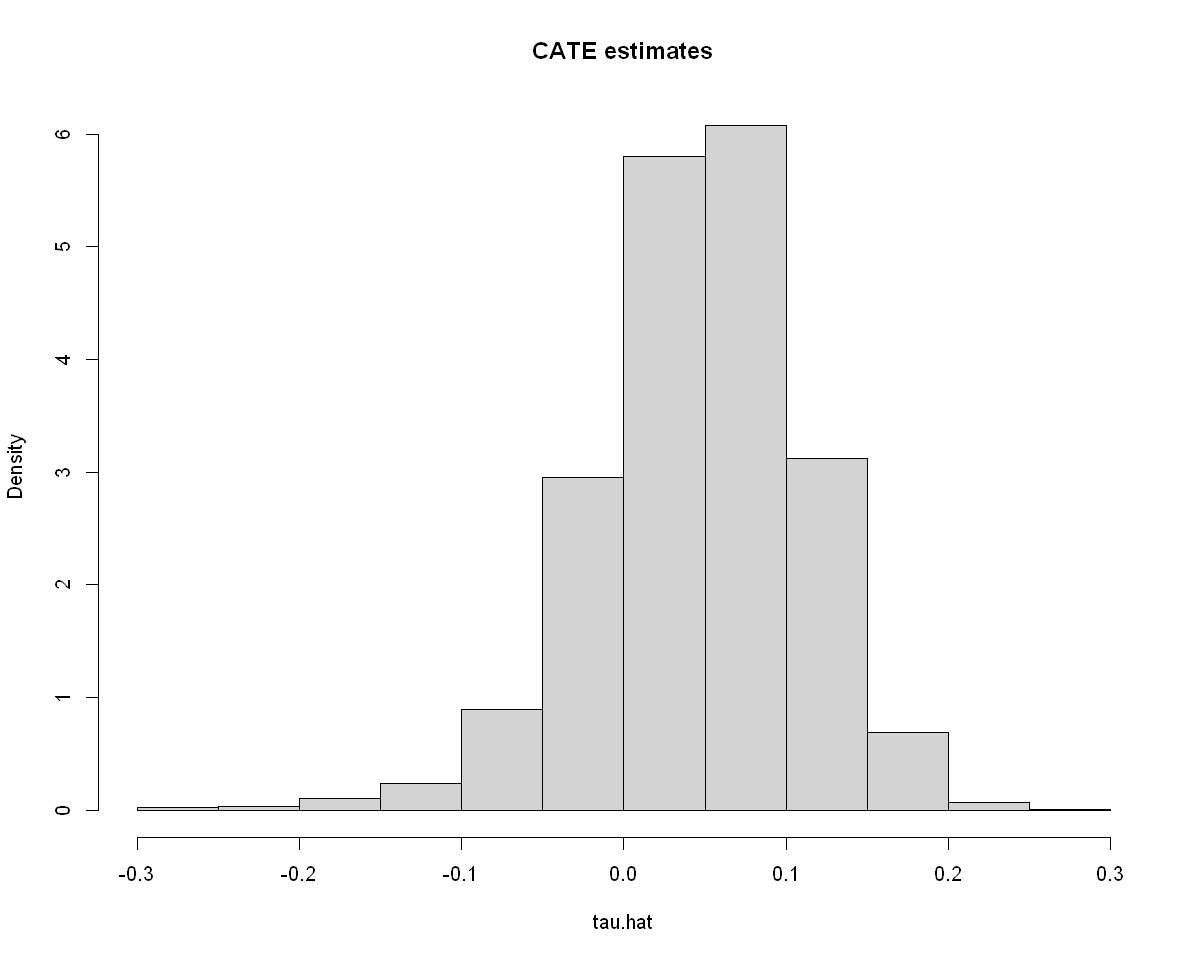

In [596]:
options(repr.plot.width=10, repr.plot.height=8)
# Do not use this for assessing heterogeneity. See text above.
hist(tau.hat, main="CATE estimates", freq=F)

In [597]:
# measure of variable importance that indicates how often a variable was used in a tree split. 
var_imp <- c(variable_importance(forest.tau))
names(var_imp) <- covariates
sorted_var_imp <- sort(var_imp, decreasing = TRUE)
sorted_var_imp[1:5]  # showing only first few

<NA>       <NA>     cpelec       <NA>        age 
0.35394767 0.34001339 0.12911512 0.06820296 0.03453923

### Data-driven subgroups

In [598]:
# Valid randomized data and observational data with unconfoundedness+overlap.
# Note: read the comments below carefully. 
# In randomized settings, do not estimate forest.e and e.hat; use known assignment probs.

covariates = c("tenured", "sex", "age", "cpelec", "cpwater",  "x_dim", "y_dim", "clasification", "level")

# Prepare dataset
fmla <- formula(stay ~  tenured + sex + age + 
                        factor(level) + factor(clasification)
                        + cpelec + cpwater + x_dim + y_dim)
X <- model.matrix(fmla, data)
W <- data[,treatment]
Y <- data[,outcome]
n <- nrow(data)

# Number of rankings that the predictions will be ranking on 
# (e.g., 2 for above/below median estimated CATE, 5 for estimated CATE quintiles, etc.)
num.rankings <- 5  

# Prepare for data.splitting
# Assign a fold number to each observation.
# The argument 'clusters' in the next step will mimick K-fold cross-fitting.
num.folds <- 10
folds <- sort(seq(n) %% num.folds) + 1

# Comment or uncomment depending on your setting.
# Observational setting with unconfoundedness+overlap (unknown assignment probs):
# forest <- causal_forest(X, Y, W, clusters = folds)
# Randomized settings with fixed and known probabilities (here: 0.5).
forest <- causal_forest(X, Y, W, W.hat=.5, clusters = folds)

# Retrieve out-of-bag predictions.
# Predictions for observation in fold k will be computed using 
# trees that were not trained using observations for that fold.
tau.hat <- predict(forest)$predictions


# Rank observations *within each fold* into quintiles according to their CATE predictions.
ranking <- rep(NA, n)
for (fold in seq(num.folds)) {
  tau.hat.quantiles <- quantile(tau.hat[folds == fold], probs = seq(0, 1, by=1/num.rankings))
  ranking[folds == fold] <- cut(tau.hat[folds == fold], tau.hat.quantiles, include.lowest=TRUE,labels=seq(num.rankings))
}

In [599]:
# Valid only in randomized settings.
# Average difference-in-means within each ranking

# Formula y ~ 0 + ranking + ranking:w
fmla <- paste0(outcome, " ~ 0 + ranking + ranking:", treatment)
ols.ate <- lm(fmla, data=transform(data, ranking=factor(ranking)))
ols.ate <- coeftest(ols.ate, vcov=vcovHC(ols.ate, type='HC2'))
interact <- which(grepl(":", rownames(ols.ate)))
ols.ate <- data.frame("ols", paste0("Q", seq(num.rankings)), ols.ate[interact, 1:2])
rownames(ols.ate) <- NULL # just for display
colnames(ols.ate) <- c("method", "ranking", "estimate", "std.err")
ols.ate

method,ranking,estimate,std.err
<chr>,<chr>,<dbl>,<dbl>
ols,Q1,-0.01253060,0.01188254
ols,Q2,0.05113264,0.01187036
ols,Q3,0.03855850,0.01204940
ols,Q4,0.07834347,0.01206670
ols,Q5,0.05802799,0.01203684


In [600]:
# Computing AIPW scores.
tau.hat <- predict(forest)$predictions
e.hat <- forest$W.hat # P[W=1|X]
m.hat <- forest$Y.hat # E[Y|X]

# Estimating mu.hat(X, 1) and mu.hat(X, 0) for obs in held-out sample
# Note: to understand this, read equations 6-8 in this vignette:
# https://grf-labs.github.io/grf/articles/muhats.html
mu.hat.0 <- m.hat - e.hat * tau.hat        # E[Y|X,W=0] = E[Y|X] - e(X)*tau(X)
mu.hat.1 <- m.hat + (1 - e.hat) * tau.hat  # E[Y|X,W=1] = E[Y|X] + (1 - e(X))*tau(X)

# AIPW scores
aipw.scores <- tau.hat + W / e.hat * (Y -  mu.hat.1) - (1 - W) / (1 - e.hat) * (Y -  mu.hat.0)
ols <- lm(aipw.scores ~ 0 + factor(ranking))
forest.ate <- data.frame("aipw", paste0("Q", seq(num.rankings)), coeftest(ols, vcov=vcovHC(ols, "HC2"))[,1:2])
colnames(forest.ate) <- c("method", "ranking", "estimate", "std.err")
rownames(forest.ate) <- NULL # just for display
forest.ate

method,ranking,estimate,std.err
<chr>,<chr>,<dbl>,<dbl>
aipw,Q1,-0.01076332,0.01142836
aipw,Q2,0.04434592,0.01149835
aipw,Q3,0.02457341,0.01147617
aipw,Q4,0.05251551,0.01150861
aipw,Q5,0.02947153,0.01151501


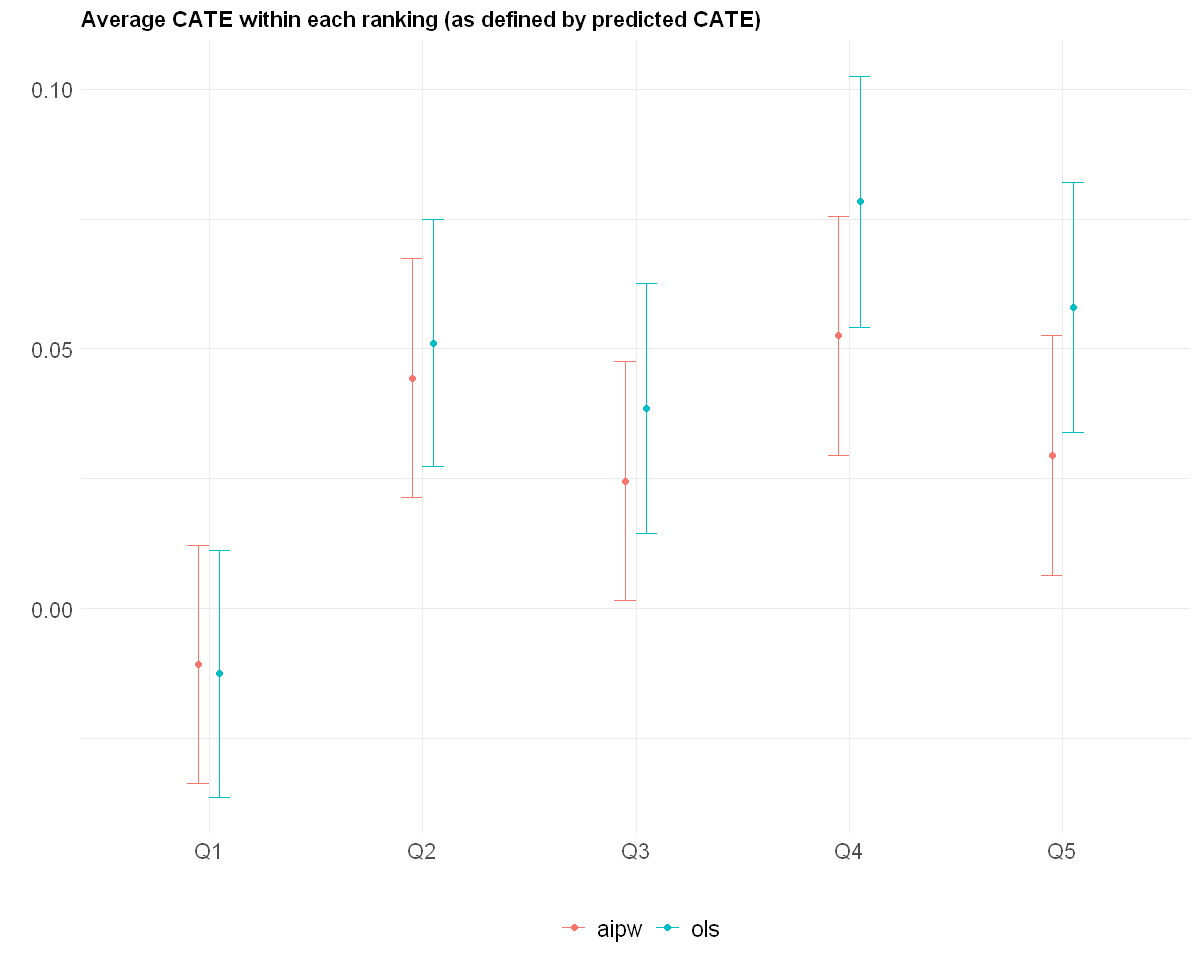

In [601]:
# Concatenate the two results.
res <- rbind(forest.ate, ols.ate)

# Plotting the point estimate of average treatment effect 
# and 95% confidence intervals around it.
options(repr.plot.width=10, repr.plot.height=8)
ggplot(res) +
  aes(x = ranking, y = estimate, group=method, color=method, fig(50,50)) + 
  geom_point(position=position_dodge(0.2)) +
  geom_errorbar(aes(ymin=estimate-2*std.err, ymax=estimate+2*std.err), width=.2, position=position_dodge(0.2)) +
  ylab("") + xlab("") +
  ggtitle("Average CATE within each ranking (as defined by predicted CATE)") +
  theme_minimal() +
  theme(plot.title = element_text(size = 13, face = "bold"),
        axis.text=element_text(size=13), 
        legend.position="bottom", legend.title = element_blank(), legend.text = element_text(size=14))

### Test predictions using difference-in-means estimator

In [602]:
# Valid in randomized settings only.

# y ~ ranking + w + ranking:w
fmla <- paste0(outcome, "~ ranking + ", treatment, " + ranking:", treatment) 
ols <- lm(fmla, data=transform(data, ranking=factor(ranking)))
interact <- which(sapply(names(coef(ols)), function(x) grepl(":", x)))
res <- summary_rw_lm(ols, indices=interact)
rownames(res) <- paste("Rank", 2:num.rankings, "- Rank 1") # just for display
res

,Estimate,Std. Error,Orig. p-value,Adj. p-value
Rank 2 - Rank 1,0.06366324,0.01694351,1.720297e-04,0.0005
Rank 3 - Rank 1,0.05108909,0.01704128,2.720184e-03,0.0035
Rank 4 - Rank 1,0.09087406,0.01717770,1.230278e-07,0.0000
Rank 5 - Rank 1,0.07055859,0.01712605,3.799742e-05,0.0001


In [603]:
# Valid in randomized and observational settings with unconfoundedness+overlap.

# Using AIPW scores computed above
ols <- lm(aipw.scores ~ 1 + factor(ranking))
res <- summary_rw_lm(ols, indices=2:num.rankings)
rownames(res) <- paste("Rank", 2:num.rankings, "- Rank 1") # just for display
res

,Estimate,Std. Error,Orig. p-value,Adj. p-value
Rank 2 - Rank 1,0.05510925,0.01624023,6.912665e-04,0.0020
Rank 3 - Rank 1,0.03533674,0.01624023,2.957237e-02,0.0279
Rank 4 - Rank 1,0.06327884,0.01624023,9.783779e-05,0.0005
Rank 5 - Rank 1,0.04023485,0.01624023,1.323691e-02,0.0248


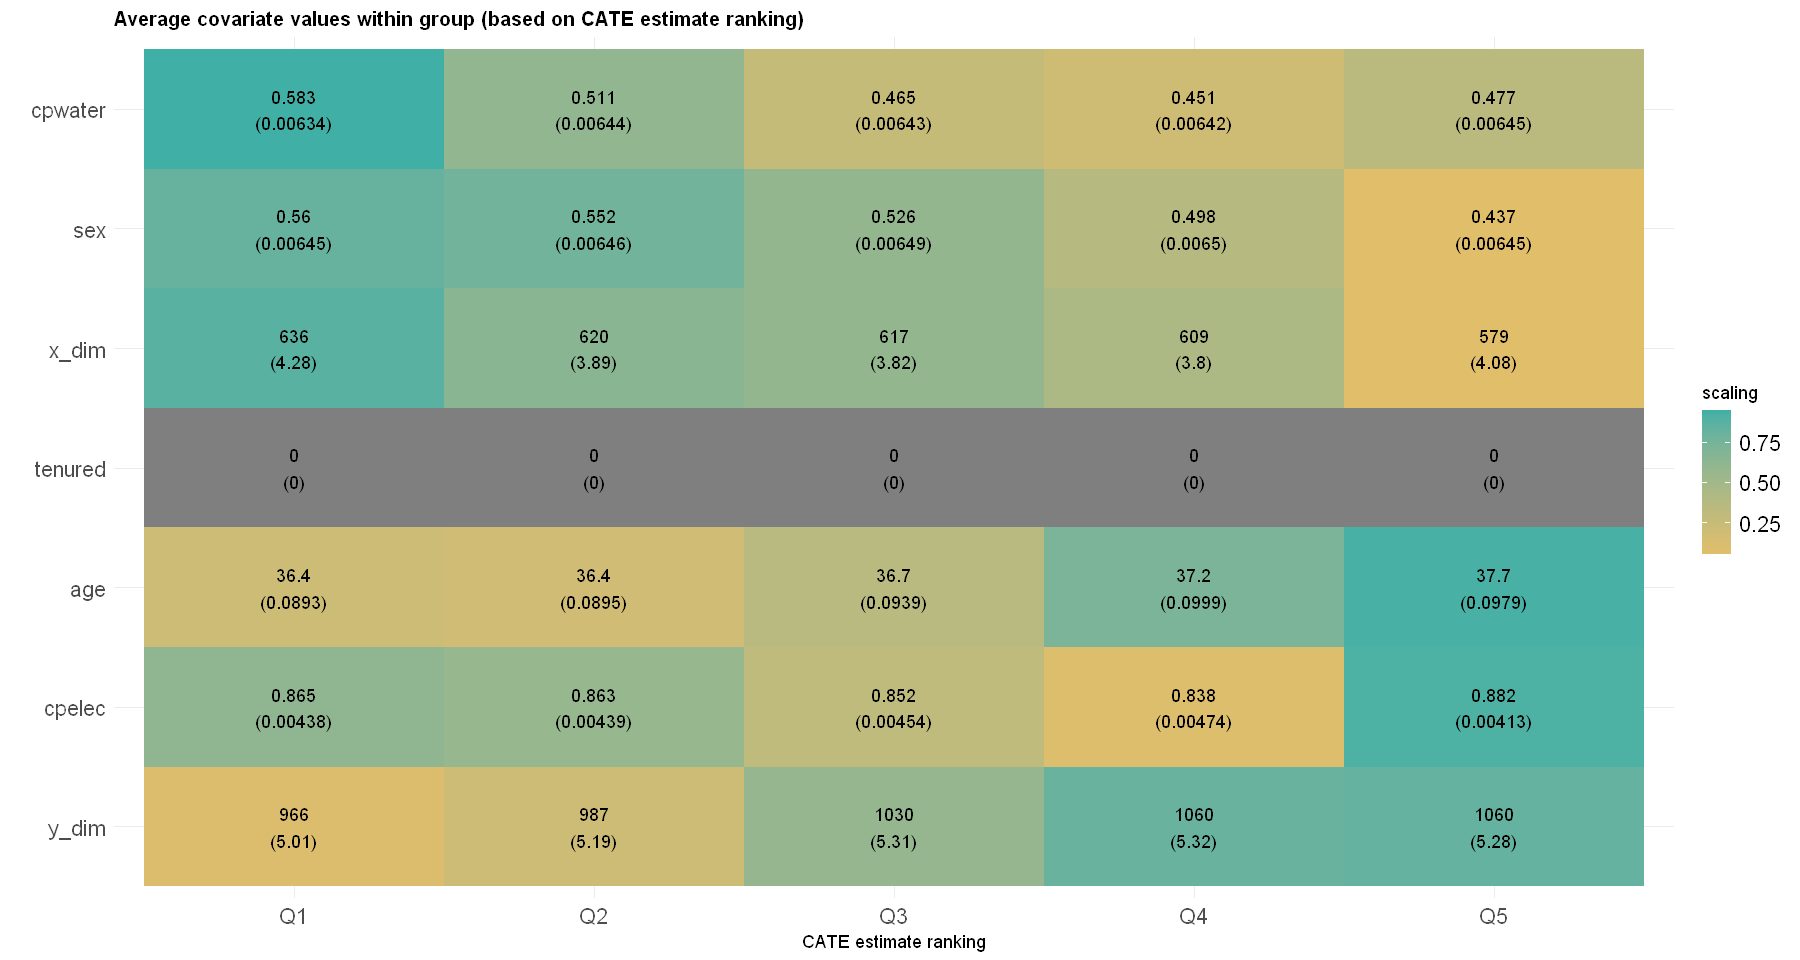

In [604]:
covariates = c("tenured", "sex", "age", "cpelec", "cpwater",  "x_dim", "y_dim")
df <- mapply(function(covariate) {
      # Looping over covariate names
      # Compute average covariate value per ranking (with correct standard errors)
      fmla <- formula(paste0(covariate, "~ 0 + ranking"))
      ols <- lm(fmla, data=transform(data, ranking=factor(ranking)))
      ols.res <- coeftest(ols, vcov=vcovHC(ols, "HC2"))
    
      # Retrieve results
      avg <- ols.res[,1]
      stderr <- ols.res[,2]
      
      # Tally up results
      data.frame(covariate, avg, stderr, ranking=paste0("Q", seq(num.rankings)), 
                 # Used for coloring
                 scaling=pnorm((avg - mean(avg))/sd(avg)), 
                 # We will order based on how much variation is 'explain' by the averages
                 # relative to the total variation of the covariate in the data
                 variation=sd(avg) / sd(data[,covariate]),
                 # String to print in each cell in heatmap below
                 labels=paste0(signif(avg, 3), "\n", "(", signif(stderr, 3), ")"))
}, covariates, SIMPLIFY = FALSE)
df <- do.call(rbind, df)


# a small optional trick to ensure heatmap will be in decreasing order of 'variation'
df$covariate <- reorder(df$covariate, order(df$variation))

options(repr.plot.width=15, repr.plot.height=8)
# plot heatmap
ggplot(df) +
    aes(ranking, covariate) +
    geom_tile(aes(fill = scaling)) + 
    geom_text(aes(label = labels)) +
    scale_fill_gradient(low = "#E1BE6A", high = "#40B0A6") +
    ggtitle(paste0("Average covariate values within group (based on CATE estimate ranking)")) +
    theme_minimal() + 
    ylab("") + xlab("CATE estimate ranking") +
    theme(plot.title = element_text(size = 12, face = "bold"),
          axis.text=element_text(size=13), 
          legend.text = element_text(size=13)) 

### Best linear projection

In [605]:
# Best linear projection of the conditional average treatment effect on covariates
best_linear_projection(forest.tau, X)

Warning message in best_linear_projection(forest.tau, X):
"Estimated treatment propensities take values between 0.076 and 1 and in particular get very close to 0 or 1."



Best linear projection of the conditional average treatment effect.
Confidence intervals are cluster- and heteroskedasticity-robust (HC3):

                          Estimate  Std. Error t value Pr(>|t|)   
(Intercept)             8.9314e-02  8.5380e-02  1.0461 0.295530   
sex                    -3.6455e-02  1.2468e-02 -2.9239 0.003459 **
age                     6.5825e-04  6.3868e-04  1.0306 0.302716   
factor.level.2         -3.2842e-02  1.5250e-02 -2.1536 0.031281 * 
factor.level.3         -2.9139e-02  2.0777e-02 -1.4025 0.160783   
factor.clasification.2 -1.5399e-03  1.6561e-02 -0.0930 0.925916   
factor.clasification.3 -8.1021e-03  1.7888e-02 -0.4529 0.650598   
cpelec                 -7.7392e-03  1.9435e-02 -0.3982 0.690473   
cpwater                -1.7193e-02  9.9082e-03 -1.7352 0.082707 . 
x_dim                  -1.0465e-05  4.3105e-05 -0.2428 0.808175   
y_dim                   7.7701e-07  3.4217e-05  0.0227 0.981883   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.

### Assessing heterogeneity

In [606]:
test_calibration(forest.tau)


Best linear fit using forest predictions (on held-out data)
as well as the mean forest prediction as regressors, along
with one-sided heteroskedasticity-robust (HC3) SEs:

                               Estimate Std. Error t value    Pr(>t)    
mean.forest.prediction          1.00341    0.16701  6.0081 9.496e-10 ***
differential.forest.prediction  0.70713    0.12712  5.5627 1.340e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


### Partial dependence

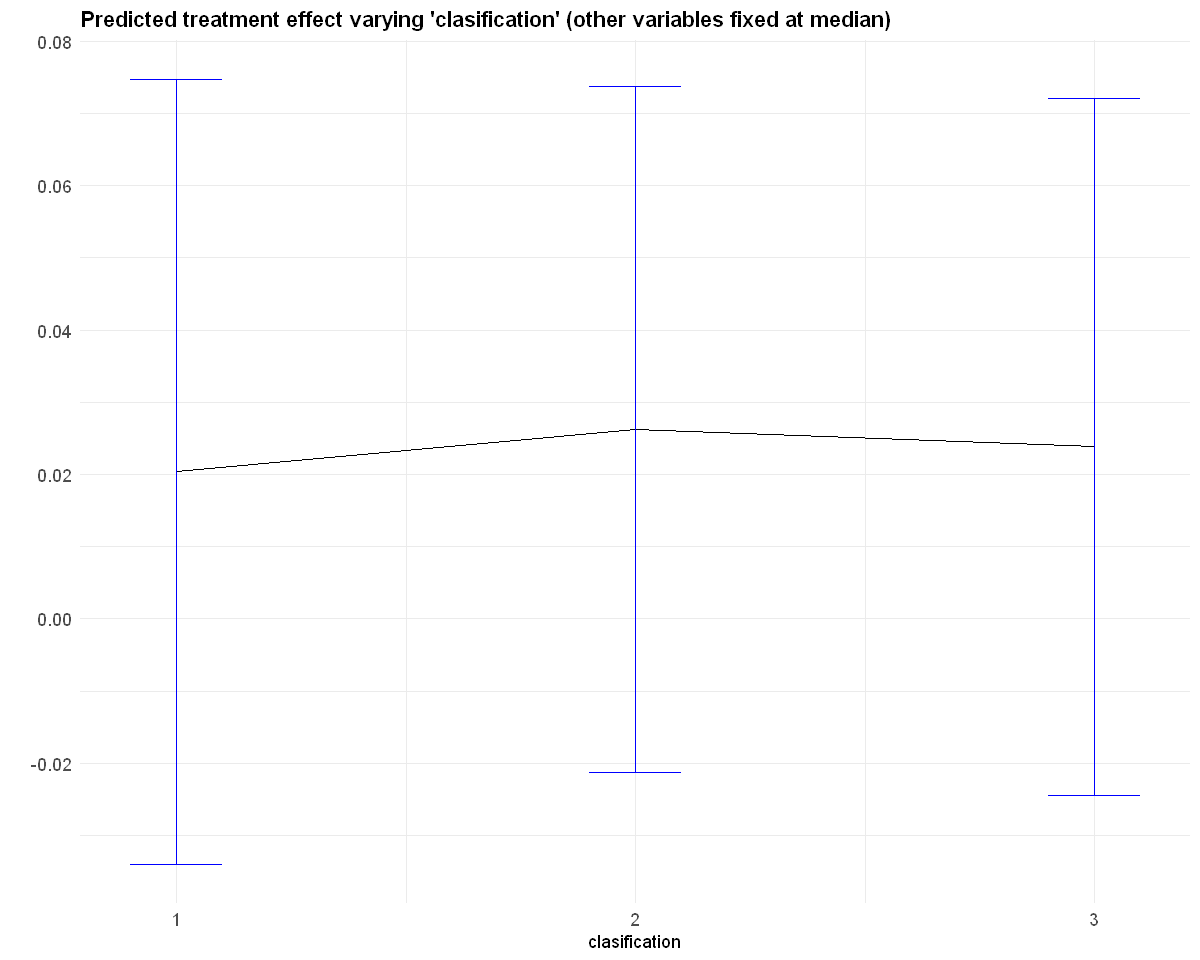

In [607]:
covariates = c("tenured", "sex", "age", "cpelec", "cpwater",  "x_dim", "y_dim", "clasification", "level")
selected.covariate <- "clasification"
# other.covariates <- covariates
other.covariates <- covariates[which(covariates != selected.covariate)]

# Fitting a forest 
# (commented for convenience; no need re-fit if already fitted above)
fmla <- formula(paste0("~ 0 + ", paste0(covariates, collapse="+")))
# fmla <- formula(stay ~  tenured + sex + age + 
#                         factor(level) + factor(clasification)
#                         + cpelec + cpwater + x_dim + y_dim)
# Note: For smaller confidence intervals, set num.trees ~ sample size
X <- model.matrix(fmla, data)
W <- data[,treatment]
Y <- data[,outcome]
forest.tau <- causal_forest(X, Y, W, W.hat=.5)  # few trees for speed here

# Compute a grid of values appropriate for the selected covariate
grid.size <- 3 
covariate.grid <- seq(min(data[,selected.covariate]), max(data[,selected.covariate]), length.out=grid.size)

# Other options for constructing a grid:
# For a binary variable, simply use 0 and 1
# grid.size <- 3
# covariate.grid <- c(0,2)  

# For a continuous variable, select appropriate percentiles
# percentiles <- c(1,2,3)
# grid.size <- length(percentiles)
# covariate.grid <- quantile(data[,selected.covariate], probs=percentiles)

# Take median of other covariates 
medians <- apply(data[, other.covariates, F], 2, median)

# Construct a dataset
data.grid <- data.frame(sapply(medians, function(x) rep(x, grid.size)), covariate.grid)
colnames(data.grid) <- c(other.covariates, selected.covariate)


# Expand the data
X.grid <- model.matrix(fmla, data.grid)

# Point predictions of the CATE and standard errors 
forest.pred <- predict(forest.tau, newdata = X.grid, estimate.variance=TRUE)

tau.hat <- forest.pred$predictions
tau.hat.se <- sqrt(forest.pred$variance.estimates)
                               
# Plot predictions for each group and 95% confidence intervals around them.
options(repr.plot.width=10, repr.plot.height=8)
data.pred <- transform(data.grid, tau.hat=tau.hat, ci.low = tau.hat - 2*tau.hat.se, ci.high = tau.hat + 2*tau.hat.se)
ggplot(data.pred) +
  geom_line(aes_string(x=selected.covariate, y="tau.hat", group = 1), color="black") +
  geom_errorbar(aes_string(x=selected.covariate, ymin="ci.low", ymax="ci.high", width=.2), color="blue") +
   ylab("") +
  ggtitle(paste0("Predicted treatment effect varying '", selected.covariate, "' (other variables fixed at median)")) +
  scale_x_continuous("clasification", breaks=covariate.grid, labels=signif(covariate.grid, 2)) +
  theme_minimal() +
  theme(plot.title = element_text(size = 13, face = "bold"),
       axis.text=element_text(size=11)) 

In [608]:
with(data, mean(clasification == 3))

[1] 0.4982098

In [609]:
mean(with(data, (clasification == 3) & (abs(age - median(age)) <= 30))) # at most 3 yrs away

[1] 0.4980747

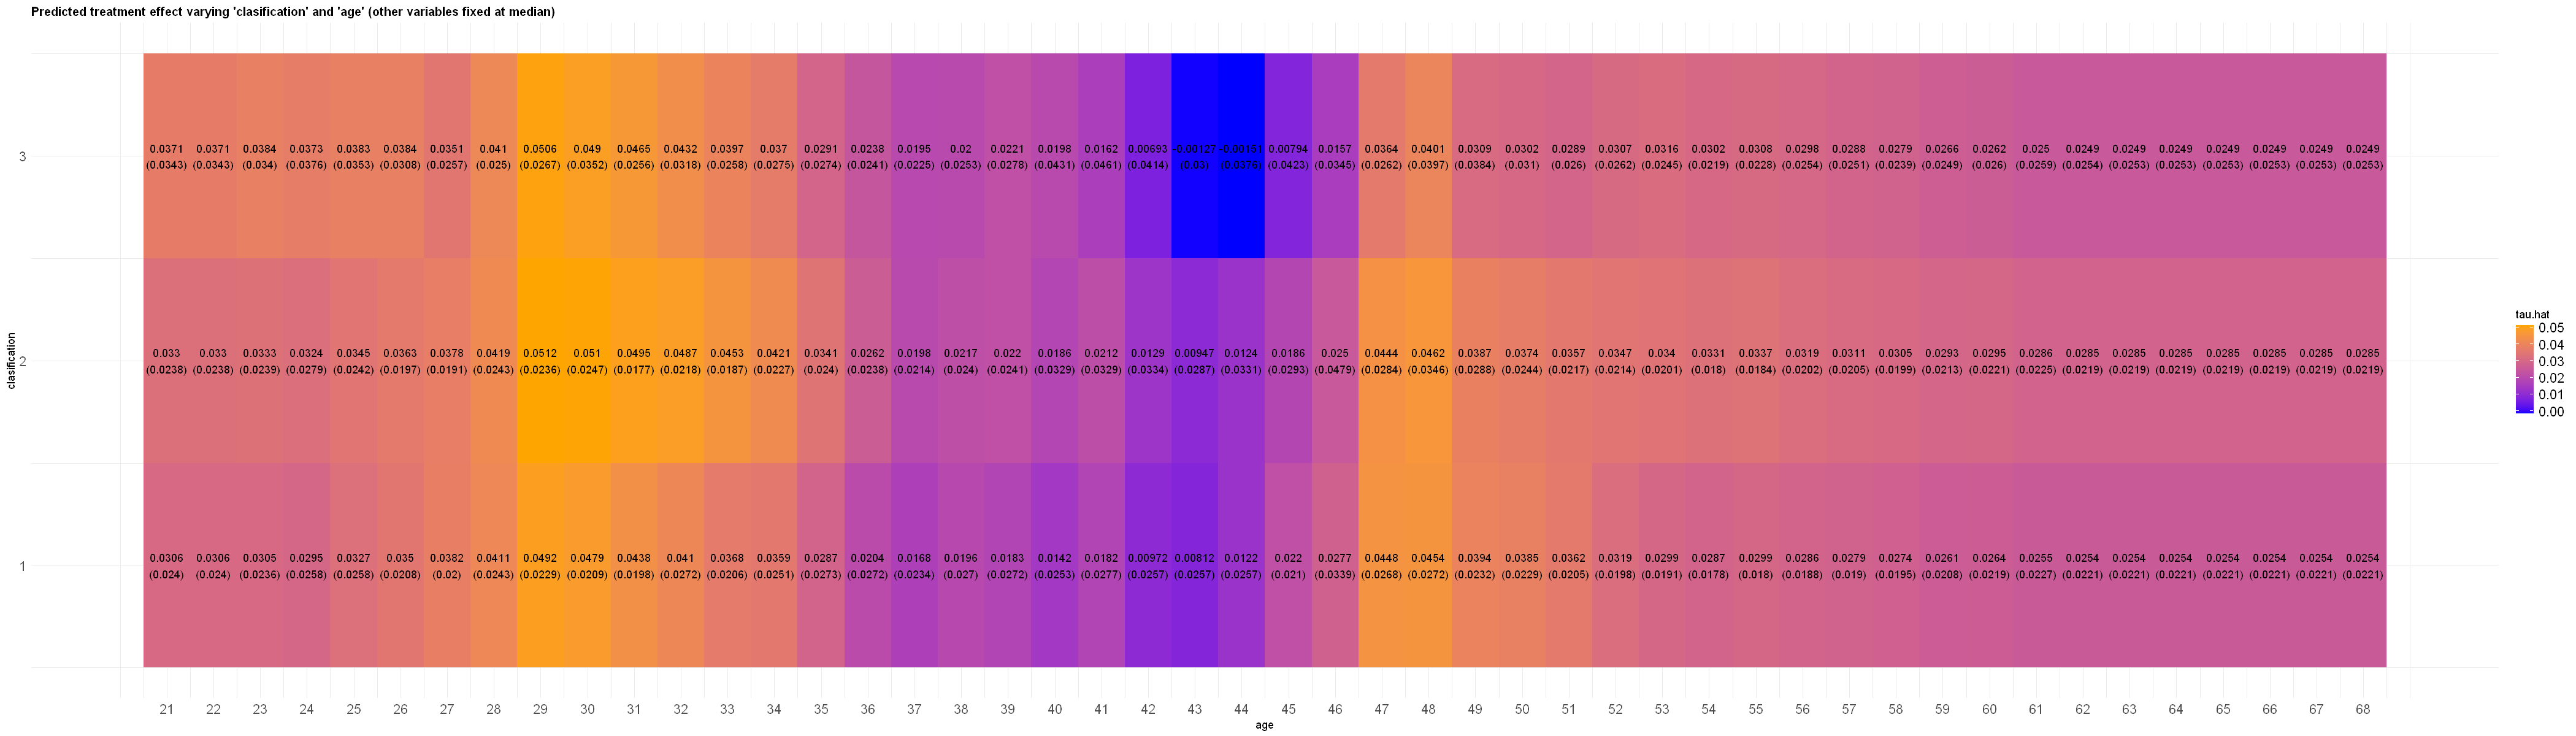

In [610]:
covariates = c("tenured", "sex", "age", "cpelec", "cpwater",  "x_dim", "y_dim", "clasification", "level")

x1 <- 'clasification'
x2 <- 'age'
selected.covariates <- c(x1, x2)
other.covariates <- covariates[-which(covariates %in% selected.covariates)]

# Compute a grid of values appropriate for the selected covariate
# See other options for constructing grids in the snippet above.
x1.grid.size <- 3
x2.grid.size <- 48

x1.grid <- seq(min(data[,x1]), max(data[,x1]), length.out=x1.grid.size)
x2.grid <- seq(min(data[,x2]), max(data[,x2]), length.out=x2.grid.size)

# Take median of other covariates 
medians <- apply(data[, other.covariates, F], 2, median)

# Construct dataset
data.grid <- data.frame(
                sapply(medians, function(x) rep(x, grid.size)), 
                expand.grid(x1.grid, x2.grid))
colnames(data.grid) <- c(other.covariates, selected.covariates)

# Expand the data according to formula used to fit forest
X.grid <- model.matrix(fmla, data.grid)

# Forest-based point estimates of CATE and standard errors around them
forest.pred <- predict(forest.tau, newdata = X.grid, estimate.variance=TRUE)
tau.hat <- forest.pred$predictions
tau.hat.se <- sqrt(forest.pred$variance.estimates)

# A vector of labels for plotting below
labels <- mapply(function(est, se) paste0(signif(est, 3), "\n", "(", signif(se, 3), ")"), tau.hat, tau.hat.se)
df <- data.frame(X.grid, tau.hat, labels)

# Plotting
options(repr.plot.width=35, repr.plot.height=10)
ggplot(df) +
    aes(age, clasification) +
    geom_tile(aes(fill = tau.hat)) + 
    geom_text(aes(label = labels)) +
    scale_fill_gradient(low = "blue", high = "orange") +
    scale_y_continuous("clasification", breaks=x1.grid, labels=signif(x1.grid, 2)) +
    scale_x_continuous("age", breaks=x2.grid, labels=signif(x2.grid, 2)) +
    ggtitle(paste0("Predicted treatment effect varying '", x1, "' and '", x2, "' (other variables fixed at median)")) +
    theme_minimal() +
    theme(plot.title = element_text(size = 12, face = "bold"),
          axis.text=element_text(size=13), 
          legend.text = element_text(size=13)) 

In [481]:
covariates = c("tenured", "sex", "age", "cpelec", "cpwater",  "nlat_ie" , "nlong_ie", "clasification", "level")

x1 <- 'nlat_ie'
x2 <- 'nlong_ie'
selected.covariates <- c(x1, x2)
other.covariates <- covariates[-which(covariates %in% selected.covariates)]

# Compute a grid of values appropriate for the selected covariate
# See other options for constructing grids in the snippet above.

percentiles <- c(0.1, 0.25, 0.5, 0.75, 0.9)
x1.grid.size <- length(percentiles)
x1.grid <- quantile(data[,x1], probs=percentiles)

x2.grid.size <- length(percentiles)
x2.grid <- quantile(data[,x2], probs=percentiles)

# Take median of other covariates 
medians <- apply(data[, other.covariates, F], 2, median)

# Construct dataset
data.grid <- data.frame(
                sapply(medians, function(x) rep(x, grid.size)), 
                expand.grid(x1.grid, x2.grid))
colnames(data.grid) <- c(other.covariates, selected.covariates)

# Expand the data according to formula used to fit forest
X.grid <- model.matrix(fmla, data.grid)

# Forest-based point estimates of CATE and standard errors around them
forest.pred <- predict(forest.tau, newdata = X.grid, estimate.variance=TRUE)
tau.hat <- forest.pred$predictions
tau.hat.se <- sqrt(forest.pred$variance.estimates)

# A vector of labels for plotting below
labels <- mapply(function(est, se) paste0(signif(est, 3), "\n", "(", signif(se, 3), ")"), tau.hat, tau.hat.se)
df <- data.frame(X.grid, tau.hat, labels)

# Plotting
options(repr.plot.width=20, repr.plot.height=8)
ggplot(df) +
    aes(nlat_ie, nlong_ie) +
    geom_tile(aes(fill = tau.hat)) + 
    geom_text(aes(label = labels)) +
    scale_fill_gradient(low = "blue", high = "orange") +
    scale_y_continuous("clasification", breaks=x1.grid, labels=signif(x1.grid, 2)) +
    scale_x_continuous("age", breaks=x2.grid, labels=signif(x2.grid, 2)) +
    ggtitle(paste0("Predicted treatment effect varying '", x1, "' and '", x2, "' (other variables fixed at median)")) +
    theme_minimal() +
    theme(plot.title = element_text(size = 12, face = "bold"),
          axis.text=element_text(size=13), 
          legend.text = element_text(size=13)) 

ERROR: Error in data.frame(sapply(medians, function(x) rep(x, grid.size)), expand.grid(x1.grid, : arguments imply differing number of rows: 3, 25
